Installation of necessary packages, libraries and working directory

In [ ]:
# Installation of needed packages
install.packages('agricolae')
install.packages("lsmeans")
install.packages("emmeans")
install.packages("daewr")


  There is a binary version available but the source version is later:
          binary source needs_compilation
agricolae  1.3-3  1.3-5             FALSE



installing the source package 'agricolae'

also installing the dependencies 'estimability', 'mvtnorm', 'emmeans'




  There are binary versions available but the source versions are later:
        binary source needs_compilation
mvtnorm  1.1-1  1.1-3              TRUE
emmeans  1.6.0  1.7.3             FALSE

  Binaries will be installed
package 'estimability' successfully unpacked and MD5 sums checked
package 'mvtnorm' successfully unpacked and MD5 sums checked
package 'lsmeans' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jdmey\AppData\Local\Temp\RtmpaESyES\downloaded_packages


installing the source package 'emmeans'




  There is a binary version available but the source version is later:
        binary source needs_compilation
emmeans  1.6.0  1.7.3             FALSE



installing the source package 'emmeans'



In [ ]:
# Activation of needed libraries
library('agricolae')
library('lsmeans')
library('emmeans')
library("daewr")

Warning message:
"package 'lsmeans' was built under R version 3.6.3"Loading required package: emmeans
The 'lsmeans' package is now basically a front end for 'emmeans'.
Users are encouraged to switch the rest of the way.
See help('transition') for more information, including how to
convert old 'lsmeans' objects and scripts to work with 'emmeans'.


In [ ]:
# Set the working directory
setwd("C:/Users/jdmey/Documents/STAT 5309")
getwd()

[1] "C:/Users/jdmey/Documents/STAT 5309"

**Question 1**

Four different designs for a digital computer circuit are being studied to compare the amount of noise present. The following data have been obtained.

In [ ]:
# Data set up
Circuit_Design <- c(1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4) # Sets up data vector for the Circuit Design column
Circuit_Design <- factor(Circuit_Design) # Factorizes the Circuit Design vector
Noise <- c(19,20,19,30,8,80,61,73,56,80,47,26,25,35,50,95,46,83,78,97) # Set up data vector for the Noise column
Circuit <- data.frame(cbind(Circuit_Design,Noise)) # Combines and converts to data frame
head(Circuit)

Circuit_Design,Noise
1,19
1,20
1,19
1,30
1,8
2,80


In [ ]:
# Create Analysis of Variance model
model1 <- aov(Noise ~ Circuit_Design, data=Circuit)
model1
summary(model1) # Output the summary for model 1

Call:
   aov(formula = Noise ~ Circuit_Design, data = Circuit)

Terms:
                Circuit_Design Residuals
Sum of Squares         5505.64   9485.16
Deg. of Freedom              1        18

Residual standard error: 22.95546
Estimated effects may be unbalanced

               Df Sum Sq Mean Sq F value  Pr(>F)   
Circuit_Design  1   5506    5506   10.45 0.00462 **
Residuals      18   9485     527                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

We can see from the p-value of the F-value that the circuit design does in fact have an inpact on the amount of noise found in the experiment

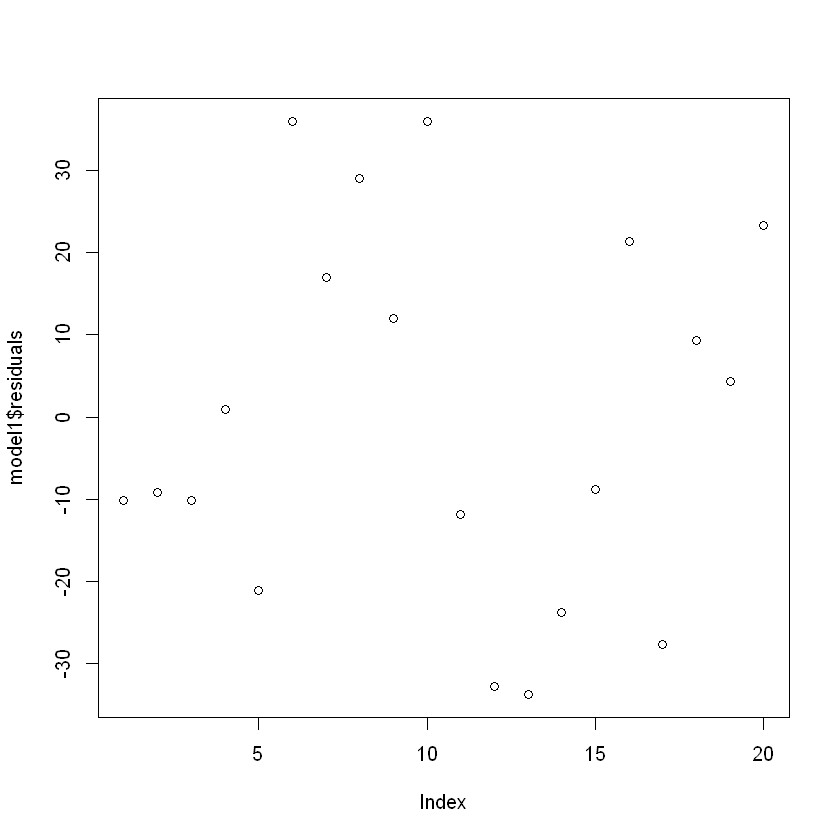

In [ ]:
plot(model1$residuals) # Plots the residuals for model 1

The residuals appear to be randomly distributed and structureless.

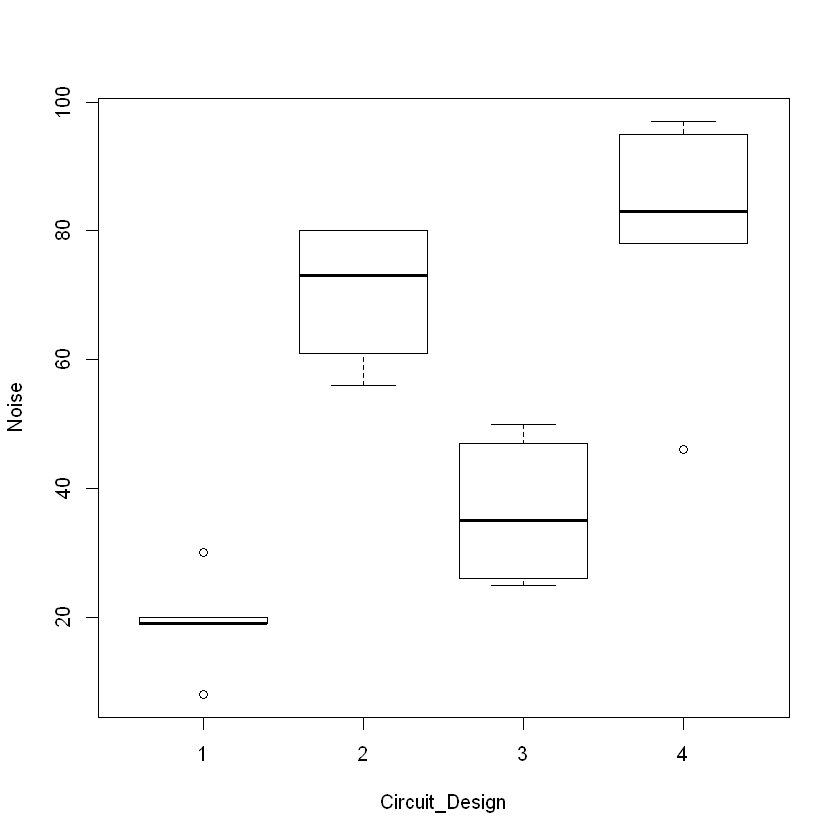

In [ ]:
boxplot(Noise ~ Circuit_Design, data = Circuit) # Creates a boxplot for Noise given Circuit Design factor

It is clear that the means and distributions of the 4 different designs are probably not the same

**Is the amount of noise present the same for all four designs? Use alpha = 0.05**

No.

The amount of noise in each design is not the same. With a p-value of 0.00462 we reject the null hypothesis that all means are the same.

**Analyze the residuals from this experiment. Are the analysis of variance assumptions satisfied?**

Yes.

If we plot the residuals it is clear that they are randomly distributed and structureless. If we plot a QQ we can see that the residuals follow the line of normality.

**Which circuit design would you select for use? Low noise is best.**

We can tell from the box plot of the different designs that design 1 produces the lowest noise. I would choose design 1.

-----------------------------------------------------------------------------------------------------------------

**Question 2**

Three brands of batteries are under study. It is suspected that the lives (in weeks) of the three brands are different. Five batteries of each brand are tested with the following results:

This is a single factor design with 3 levels

In [ ]:
# Set up the Dataframe along with needed vectors
Brand <- c(1,1,1,1,1,2,2,2,2,2,3,3,3,3,3)
Brand_simple <- c(1,2,3)
data <- c(100,96,92,96,92,76,80,75,84,82,108,100,96,98,100)
brand1 <- c(100,96,92,96,92)
brand2 <- c(76,80,75,84,82)
brand3 <- c(108,100,96,98,100)
total_brand <- cbind(brand1,brand2,brand3)
batteries <- data.frame(cbind(Brand,data))
head(batteries)

Brand,data
1,100
1,96
1,92
1,96
1,92
2,76
2,80
2,75
2,84
2,82


brand1 brand2 brand3 
  95.2   79.4  100.4

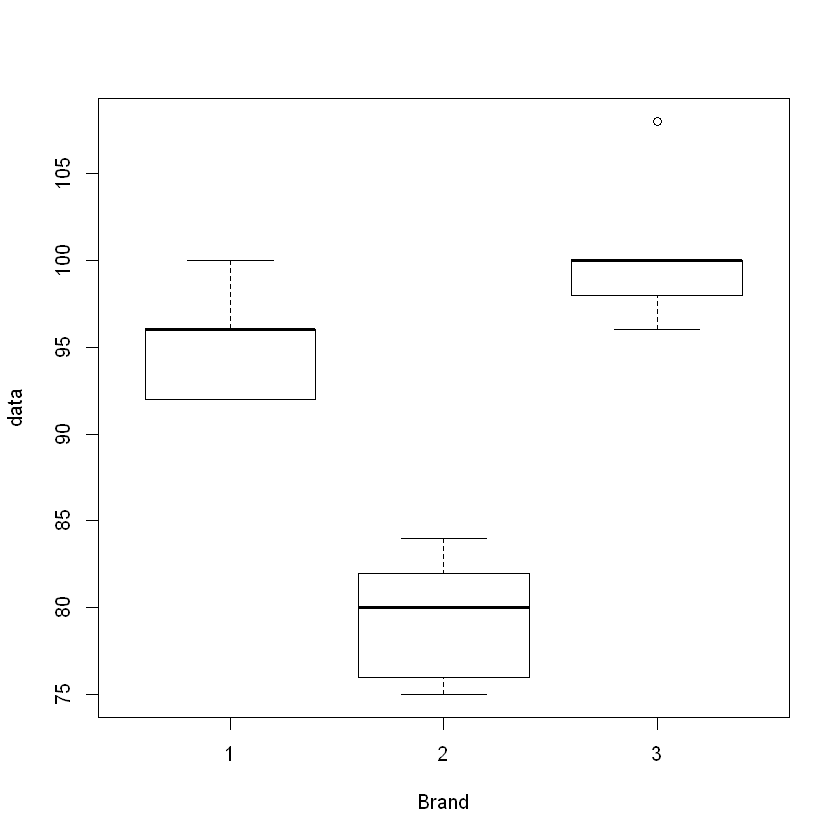

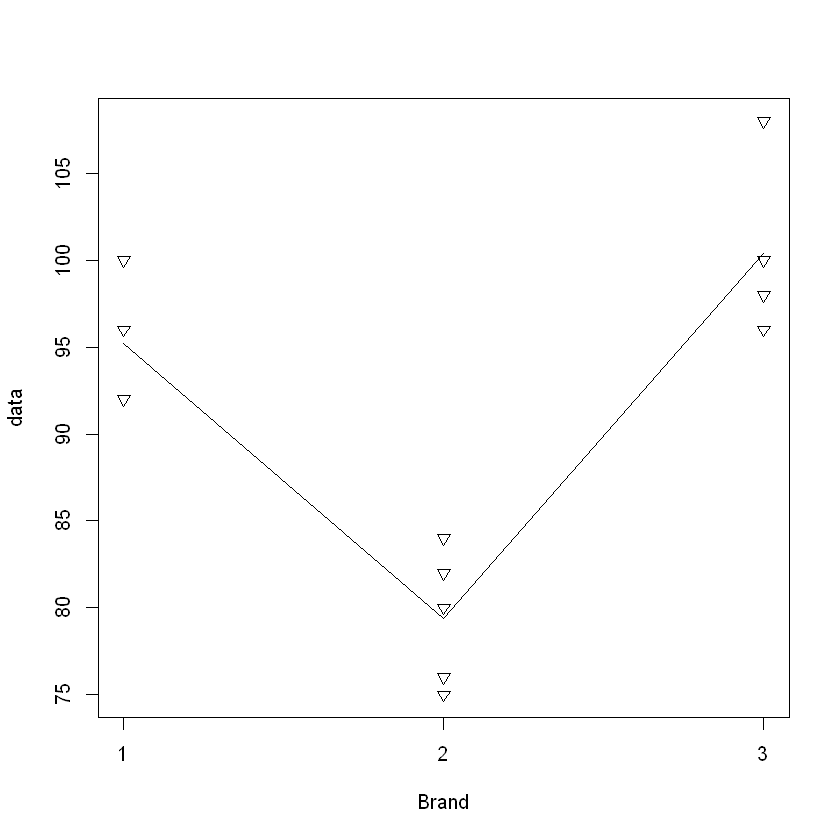

In [ ]:
# Boxplot and Stripchart
boxplot(data~Brand,data=batteries)
means <- apply(total_brand,2,mean)
means
stripchart(data~Brand,data=batteries, xlab = "Brand", vertical = TRUE, pch=6)
lines(means)

Call:
   aov(formula = data ~ Brand, data = batteries)

Terms:
                   Brand Residuals
Sum of Squares    67.600  1315.733
Deg. of Freedom        1        13

Residual standard error: 10.06033
Estimated effects may be unbalanced

            Df Sum Sq Mean Sq F value Pr(>F)
Brand        1   67.6    67.6   0.668  0.429
Residuals   13 1315.7   101.2               

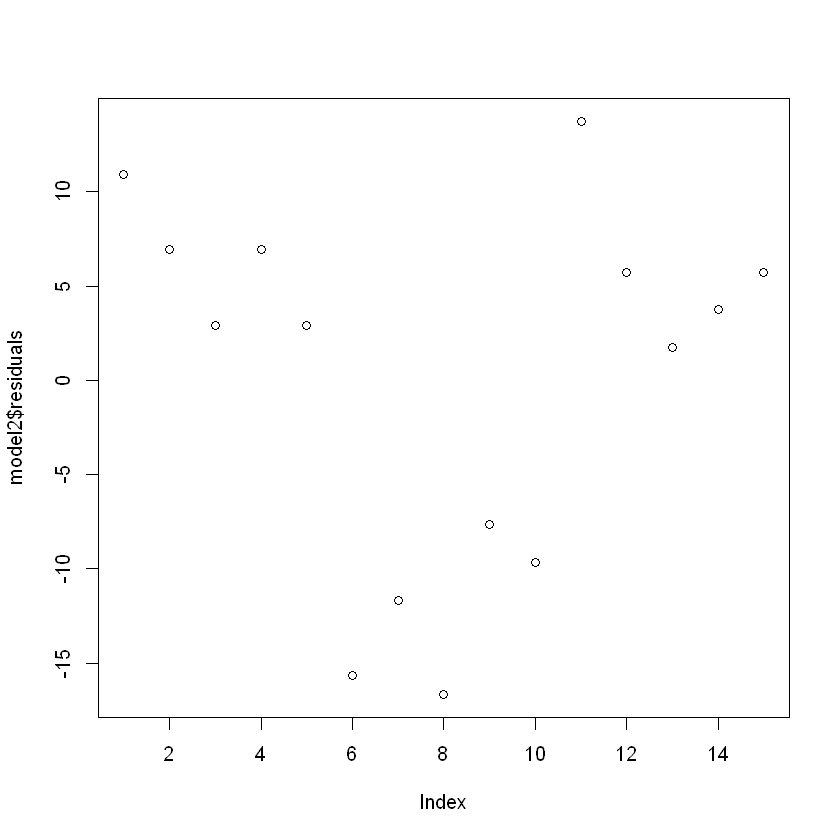

In [ ]:
# ANOVA model and summary
model2 <- aov(data ~ Brand, data = batteries)
model2
summary(model2)
plot(model2$residuals)

In [ ]:
# CI part 1
brand2 <- c(76,80,75,84,82)
brand2_mean <- mean(brand2)
brand2_sd <- sd(brand2)
margin <- qt(0.975,df=length(5-1)*brand2_sd/sqrt(length(5)))
sample_CI_High <- brand2_mean+margin
sample_CI_Low <- brand2_mean-margin
sample_CI_High
sample_CI_Low

[1] 82.22052

[1] 76.57948

In [ ]:
# CI part 2
brand3 <- c(108,100,96,98,100)
brand_diff <- abs(brand2-brand3)
brand_diff_mean <- mean(brand_diff)
brand_diff_sd <- sd(brand_diff)
margin <- qt(0.985,df=length(5-1)*brand_diff_sd/sqrt(length(5)))
brand_diff_mean_sample_CI_High <- brand_diff_mean+margin
brand_diff_mean_sample_CI_Low <- brand_diff_mean-margin
brand_diff_mean_sample_CI_High
brand_diff_mean_sample_CI_Low

[1] 23.74366

[1] 18.25634

**Are the lives of these brands of batteries different?**

No.

These lives of these brands of batteries are not significantly different at a .05 alpha level

-----------------------------------------------------------------------------------------------------------------

**Question 3**

Johnson and Leone describe an experiment to investrigate warping of copper plates. The two factores studied were the temperature and the copper content of the plates. The response variable was a measure of the amount of warping. The data were as follows:

In [ ]:
# Read in data from working directory
data <- read.csv('Mid Term Question 3.csv')

In [ ]:
# Construct the data frame and needed vectors
plates <- data
Warping  <- plates$Warping
Temperature  <- plates$Temperature
Copper.Content <- factor(plates$Copper.Content)

In [ ]:
head(plates)

Copper.Content,Temperature,Warping
40,50,17
40,50,20
60,50,16
60,50,21
80,50,24
80,50,22


Call:
   aov(formula = Warping ~ Temperature + Copper.Content + Temperature * 
    Copper.Content, data = plates)

Terms:
                Temperature Copper.Content Temperature:Copper.Content Residuals
Sum of Squares      26.4063       652.0563                     0.2112  398.0450
Deg. of Freedom           1              1                          1        28

Residual standard error: 3.770397
Estimated effects may be unbalanced

                           Df Sum Sq Mean Sq F value   Pr(>F)    
Temperature                 1   26.4    26.4   1.858    0.184    
Copper.Content              1  652.1   652.1  45.868 2.35e-07 ***
Temperature:Copper.Content  1    0.2     0.2   0.015    0.904    
Residuals                  28  398.0    14.2                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

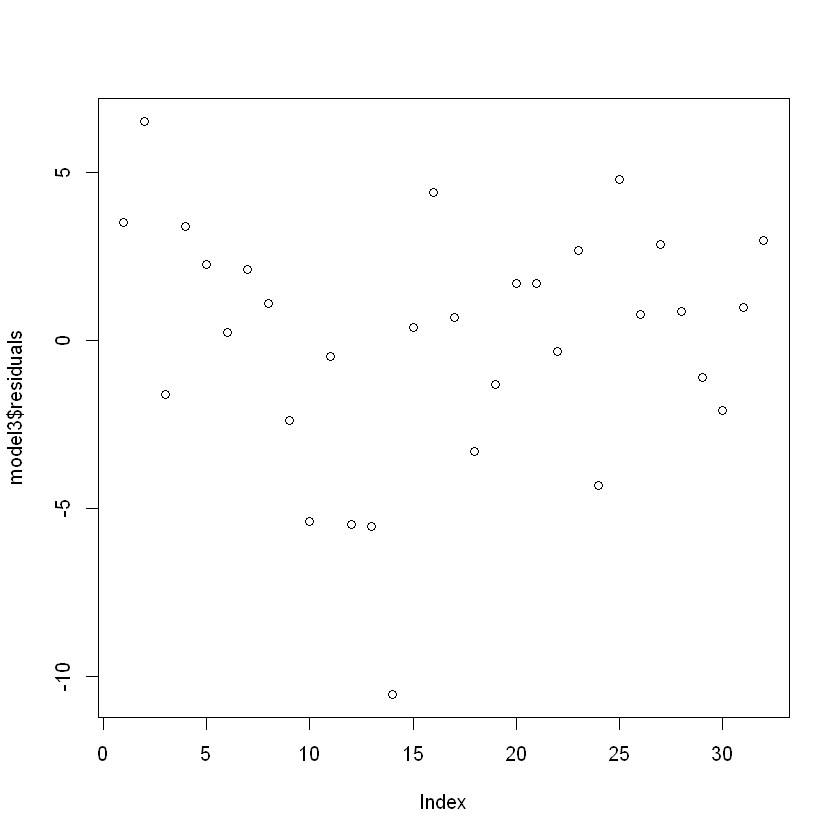


	Bartlett test of homogeneity of variances

data:  res by Temperature
Bartlett's K-squared = 5.0387, df = 3, p-value = 0.169


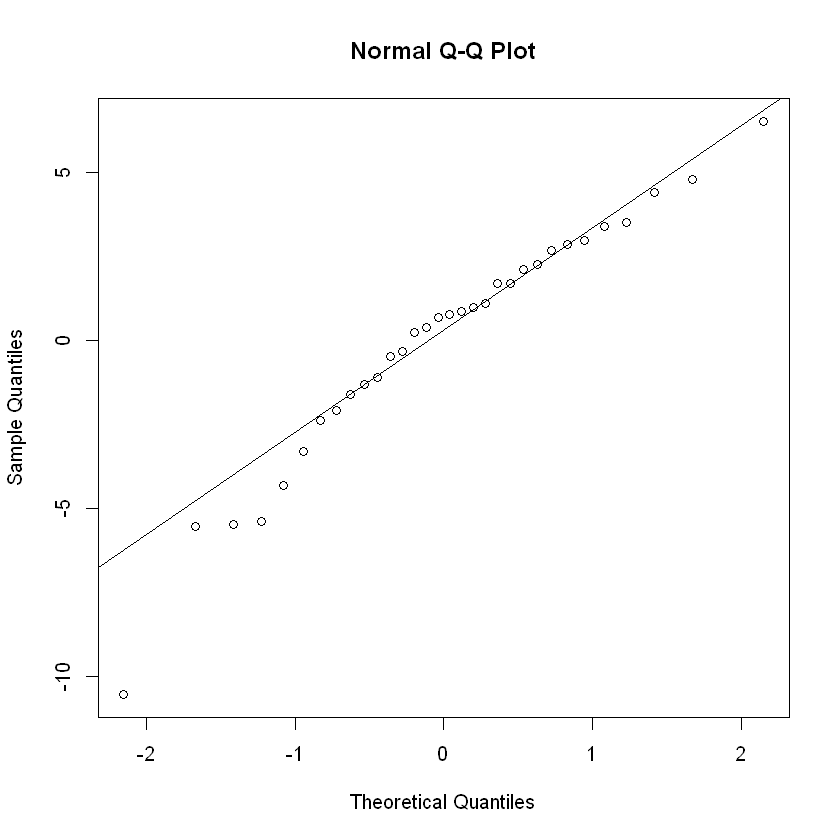

In [ ]:
# Fit and summerizes model
model3 <- aov(Warping ~ Temperature + Copper.Content + Temperature*Copper.Content, data=plates)
model3
res <- model3$residuals
summary(model3)
plot(model3$residuals)
qqnorm(model3$residuals)
qqline(model3$residuals)
bartlett.test(res ~ Temperature)

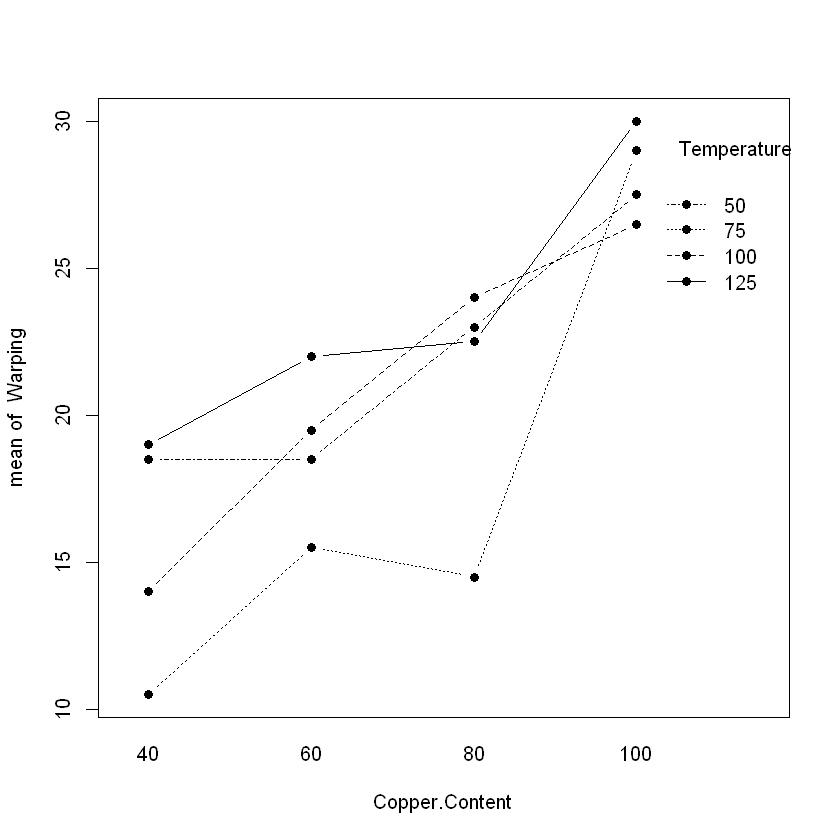

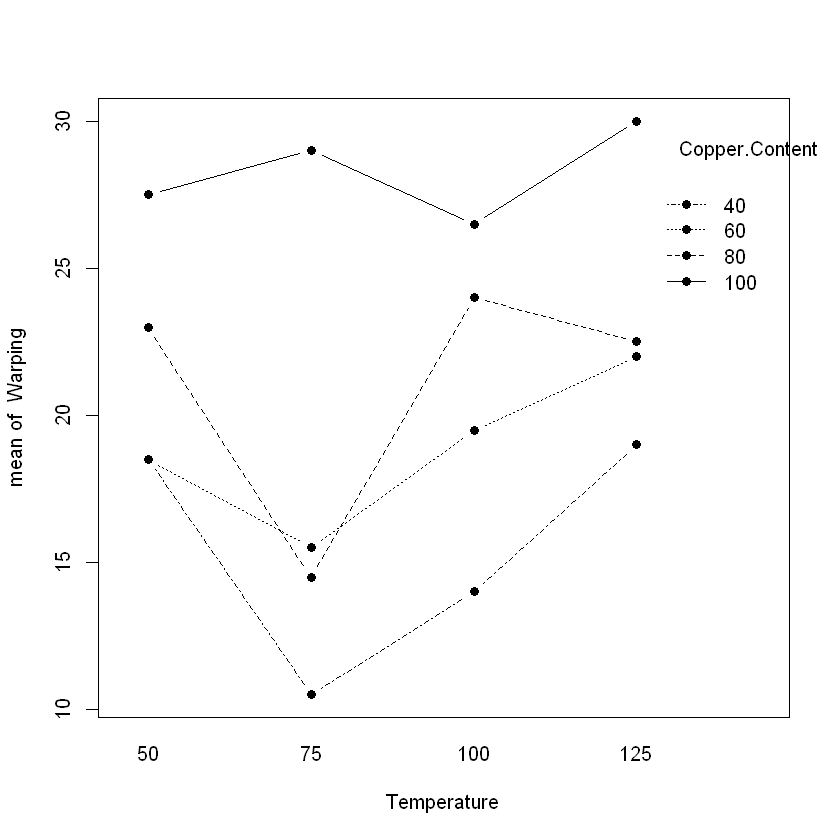

In [ ]:
# Check for interactions between factors by plotting the interactions plots
interaction.plot(Copper.Content,Temperature,Warping,type="b",pch=19,fixed=T)
interaction.plot(Temperature,Copper.Content,Warping,type="b",pch=19,fixed=T)

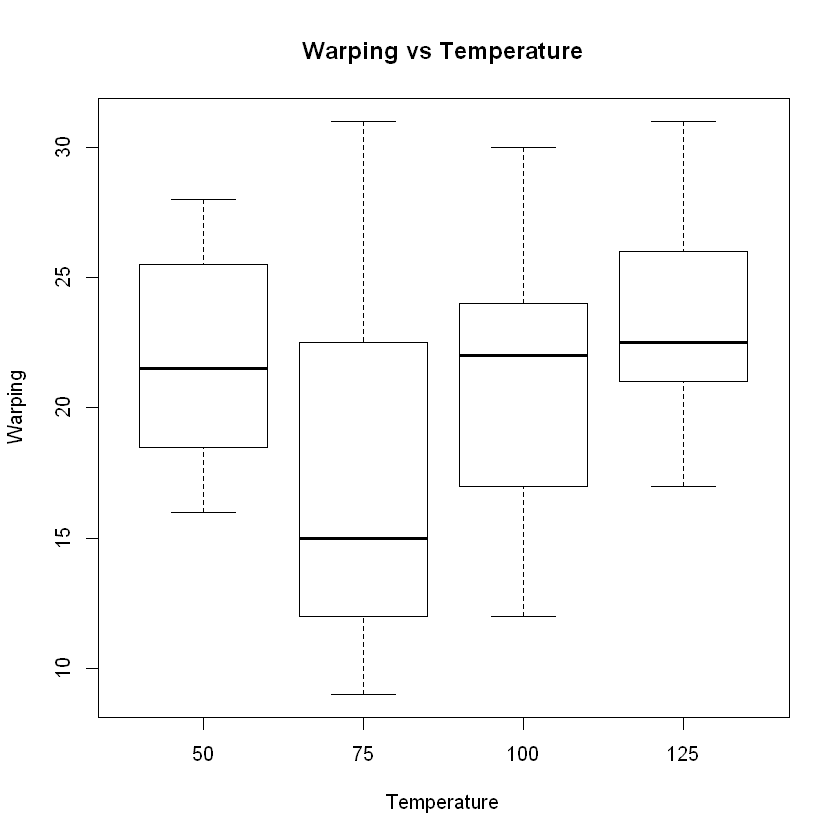

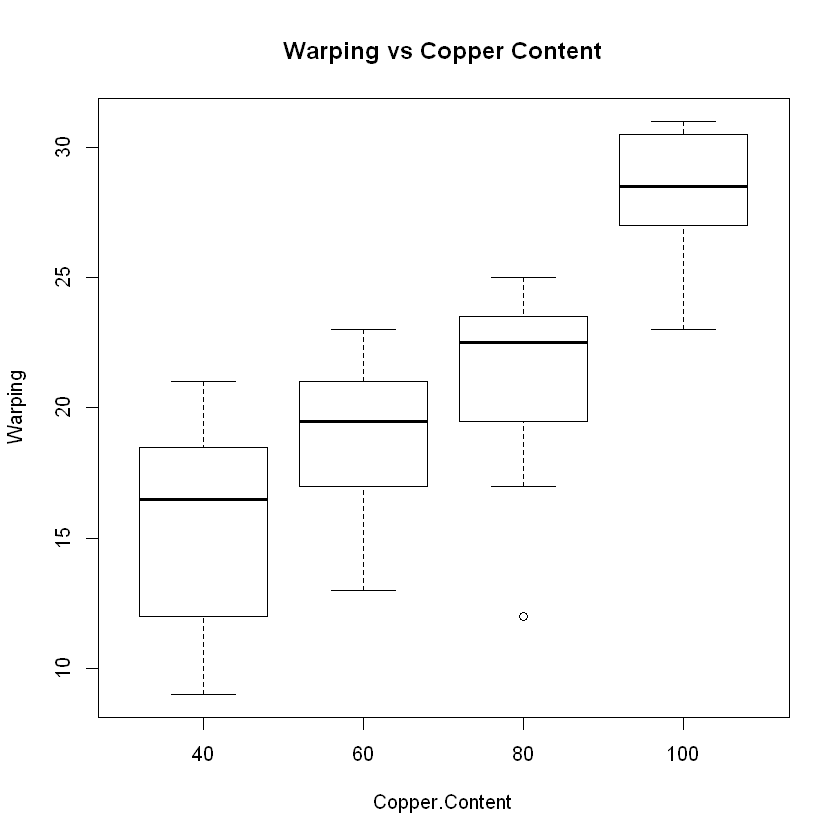

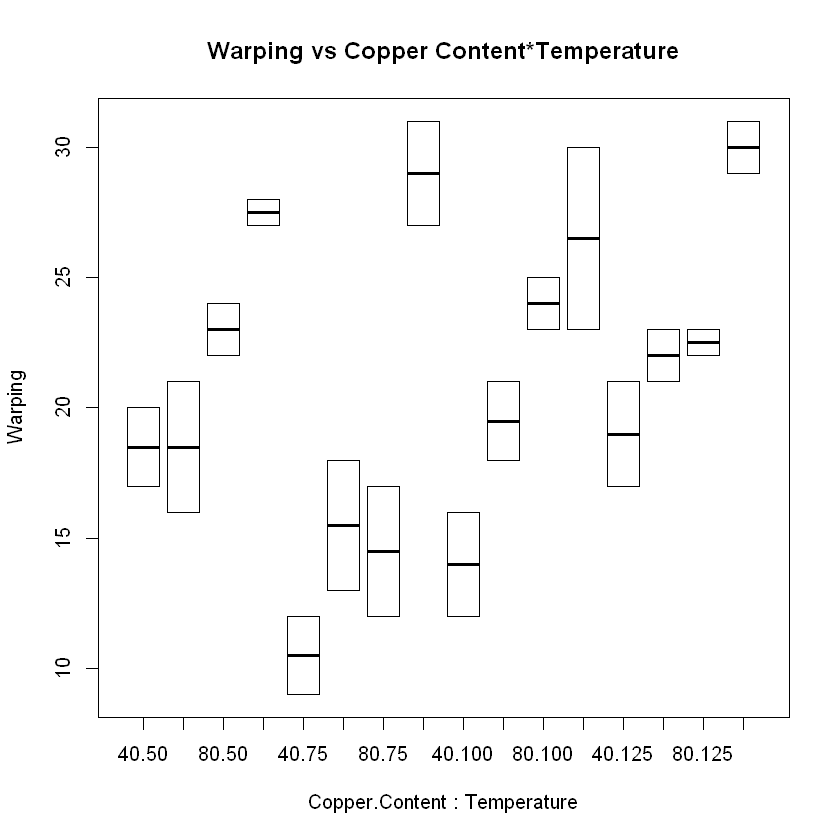

In [ ]:
# Explore the data set using boxplots
boxplot(Warping ~ Temperature,main="Warping vs Temperature")
boxplot(Warping ~ Copper.Content,main="Warping vs Copper Content")
boxplot(Warping ~ Copper.Content*Temperature,main="Warping vs Copper Content*Temperature")

**Build a regression model using aov(). Is there any indication that either factor affects the amount of warping?**

Yes.

We can see from the aov summary that Copper Content has a significant impact on warping when measured at the .05 alpha level.

**Is there any interaction between the factors. Use alpha = 0.05**

Yes.

We can see from the interaction plots that there are several places where the factors interact. However, these interactions do not appear to have a significant impact on the response variable.

**Do a Box plot on Temperature, on Content and on Temperature * Content. Which level combination give the lowest warpage?**

A copper content of 40 with a temperature of 75 degrees gives the lowest average warpage.

**Suppose Temperature cannot be controlled in where the copper plate are used, which Content gives the smallest warpage?**

75 degrees celsius gives the smallest warpage

**Perform a 3-part residuals assumption check of the aov model. (Do not use plot(model))**

The residuals appear to be structureless, normally distributed and independent

-----------------------------------------------------------------------------------------------------------------

**Question 4**

An experiment is conductd to study the influence of the operating temperature and three types of face-plate glass in the light output of an oscilloscope. The following data are collected:

In [ ]:
# Call data from the working directory
data <- read.csv('Mid Term Question 4.csv')

In [ ]:
# Construct the data frame and needed vectors
tubes <- data
head(tubes)
Glass.Type <- factor(tubes$Glass.Type)
Temp <- factor(tubes$Temperature)
Light <- tubes$Light.Output

Glass.Type,Temperature,Light.Output
1,100,580
1,100,568
1,100,570
2,100,550
2,100,530
2,100,579


In [ ]:
# Construct the model and its summaries
model4 <- aov(Light.Output ~ Temperature + Glass.Type + Temperature*Glass.Type, data=tubes)
model4
summary(model4)

Call:
   aov(formula = Light.Output ~ Temperature + Glass.Type + Temperature * 
    Glass.Type, data = tubes)

Terms:
                Temperature Glass.Type Temperature:Glass.Type Residuals
Sum of Squares    1779755.6   141157.6               187500.0  309917.0
Deg. of Freedom           1          1                      1        23

Residual standard error: 116.0804
Estimated effects may be unbalanced

                       Df  Sum Sq Mean Sq F value   Pr(>F)    
Temperature             1 1779756 1779756  132.08 5.21e-11 ***
Glass.Type              1  141158  141158   10.48  0.00364 ** 
Temperature:Glass.Type  1  187500  187500   13.91  0.00110 ** 
Residuals              23  309917   13475                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

We can see from the aov summary output that there is an significant interaction between Temperature and Glass Type at the .05 alpha level

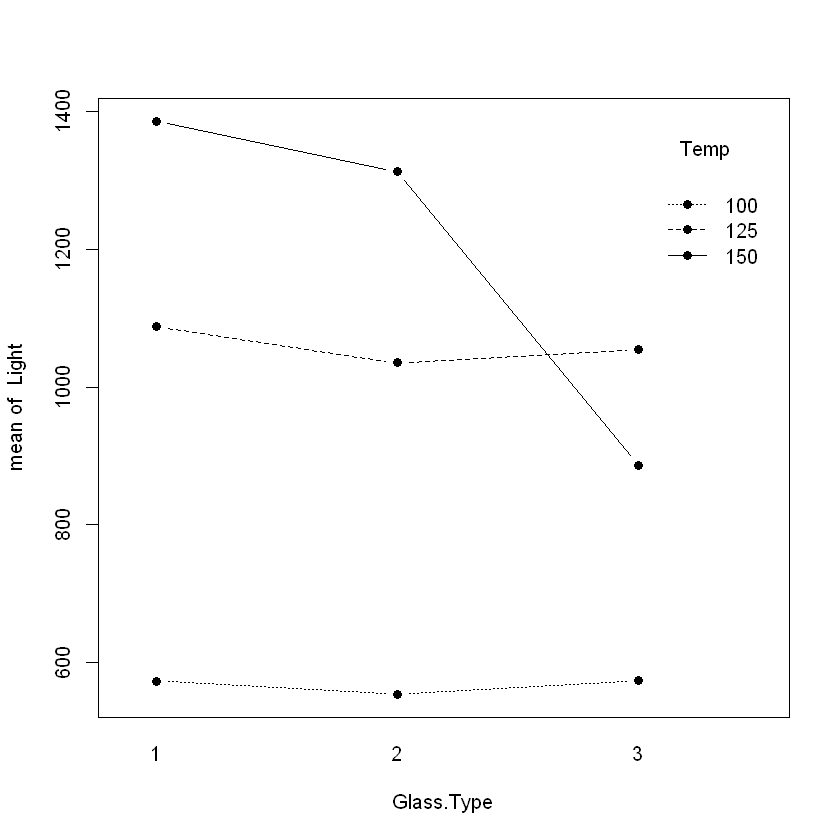

In [ ]:
# Check interactions by plotting the factors
interaction.plot(Glass.Type,Temp,Light,type="b",pch=19,fixed=T)

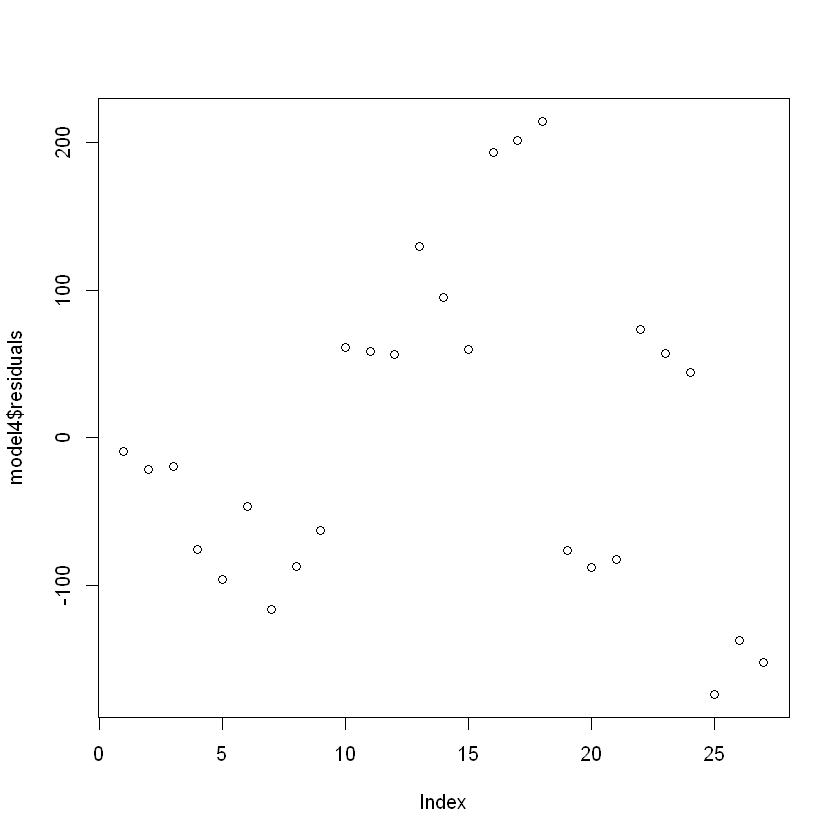

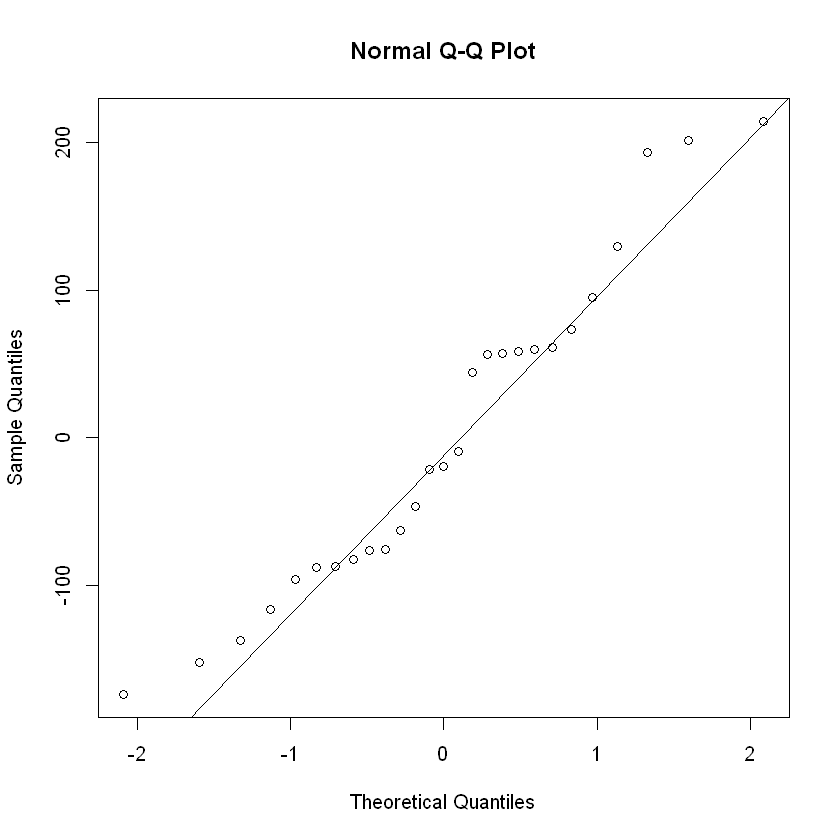

In [ ]:
# Check for model adequacy by plotting the residuals and the QQ of the residuals
plot(model4$residuals)
qqnorm(model4$residuals)
qqline(model4$residuals)

In [ ]:
# Check the means at each level given each factor
model.tables(model4, type='means')

Warning message in replications(paste("~", xx), data = mf):
"non-factors ignored: Temperature"Warning message in replications(paste("~", xx), data = mf):
"non-factors ignored: Glass.Type"Warning message in replications(paste("~", xx), data = mf):
"non-factors ignored: Temperature, Glass.Type"

Tables of means
Grand mean
         
940.1852 

 Temperature 
Temperature
   100    125    150 
 625.7  940.2 1254.6 

 Glass.Type 
Glass.Type
     1      2      3 
1028.7  940.2  851.6 

 Temperature:Glass.Type 
           Glass.Type
Temperature 1      2      3     
        100  589.3  625.7  662.2
        125 1028.7  940.2  851.6
        150 1468.2 1254.6 1041.1

**Is there a significant interaction effect?**

Yes

If we plot the interaction between Glass Type and Temperature it is clear that there is an interaction between Glass Type 3 and Temperatures 125 - 150

**Does glass type or temperature affect the response?**

Both glass type and temperature affect the response. Both p-values are significant at the .05 alpha level

**What conclusions can you draw?**

That there is an interaction in the reponse when glass type goes from 2 to 3 and temperature goes from 125 to 150. We can tell that this interaction is statistically significant. We can see that each main effects also has a statistically significant impact on the response variable as well. From the model.tables we can see that the best combination for light output is glass type 1 combined with a temperature of 150.

-----------------------------------------------------------------------------------------------------------------

**Question 5**

Temperature, Salinity, and Density affect growth and survival of Shrimps. 3 factors: “Temperature” (25 degree, 35 degree), “Salinity” (10%,25%, 40%), “Density” (80 shrimp/40 liters, 160/40 liters).

Enter into a data frame, named “shrimp”, with 3 factors “Temp”, “Density”, “Salinity”.

In [ ]:
# Read in data from the working directory and construct the data frame and needed vectors
data5  <- read.csv('Mid Term Question 5.csv')
shrimp <- data5
head(shrimp)
weight.gain <- shrimp$Weight.Gain
salinity <- factor(shrimp$Salinity)
density <- factor(shrimp$Density)
temperature <- factor(shrimp$Temperature)

Temperature,Density,Salinity,Weight.Gain
25,80,0.10,86
25,80,0.10,52
25,80,0.10,73
25,80,0.25,544
25,80,0.25,371
25,80,0.25,482


In [ ]:
# Construct the model and its summaries
model5 <- aov(weight.gain ~ salinity+density+temperature+salinity*density*temperature)
model5
summary(model5)
summary.lm(model5)

Call:
   aov(formula = weight.gain ~ salinity + density + temperature + 
    salinity * density * temperature)

Terms:
                 salinity   density temperature salinity:density
Sum of Squares   96762.50  21218.78    15376.00           674.39
Deg. of Freedom         2         1           1                2
                salinity:temperature density:temperature
Sum of Squares             300855.17             8711.11
Deg. of Freedom                    2                   1
                salinity:density:temperature Residuals
Sum of Squares                      24038.39  69690.67
Deg. of Freedom                            2        24

Residual standard error: 53.88671
Estimated effects may be unbalanced

                             Df Sum Sq Mean Sq F value   Pr(>F)    
salinity                      2  96763   48381  16.661 2.90e-05 ***
density                       1  21219   21219   7.307   0.0124 *  
temperature                   1  15376   15376   5.295   0.0304 *  
salinity:density              2    674     337   0.116   0.8909    
salinity:temperature          2 300855  150428  51.804 1.96e-09 ***
density:temperature           1   8711    8711   3.000   0.0961 .  
salinity:density:temperature  2  24038   12019   4.139   0.0285 *  
Residuals                    24  69691    2904                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Call:
aov(formula = weight.gain ~ salinity + density + temperature + 
    salinity * density * temperature)

Residuals:
     Min       1Q   Median       3Q      Max 
-125.000  -25.750    3.333   31.500   78.333 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                             70.3333    31.1115   2.261  0.03313 *  
salinity0.25                           395.3333    43.9983   8.985 3.81e-09 ***
salinity0.4                            288.6667    43.9983   6.561 8.73e-07 ***
density160                               0.3333    43.9983   0.008  0.99402    
temperature35                          337.6667    43.9983   7.675 6.53e-08 ***
salinity0.25:density160               -133.0000    62.2230  -2.137  0.04295 *  
salinity0.4:density160                -107.0000    62.2230  -1.720  0.09837 .  
salinity0.25:temperature35            -528.6667    62.2230  -8.496 1.07e-08 ***
salinity0.4:temperature35             -453.6667    6

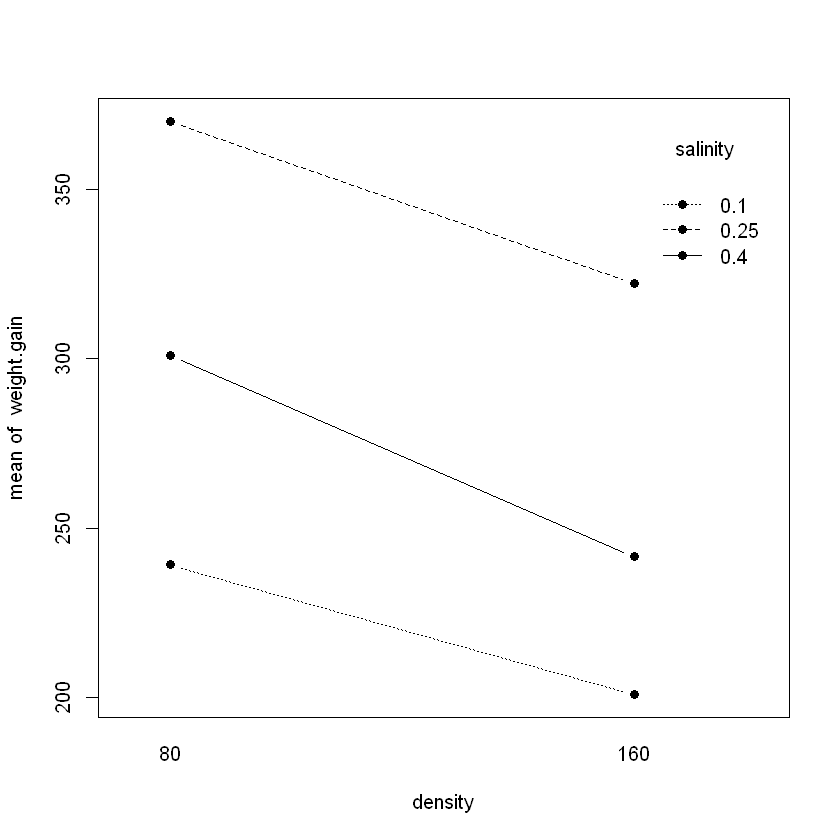

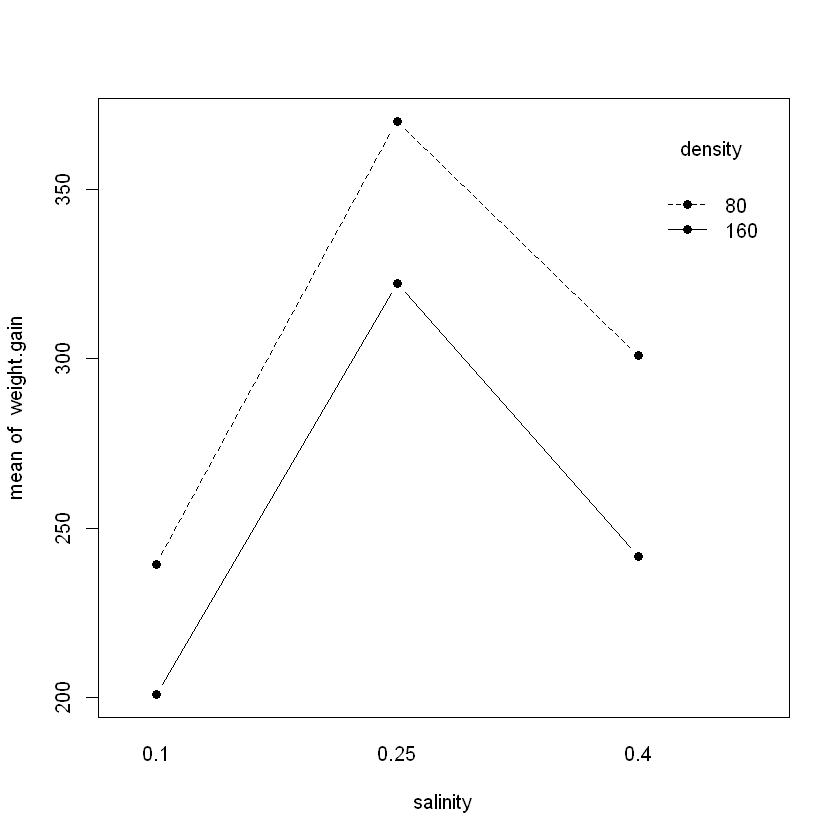

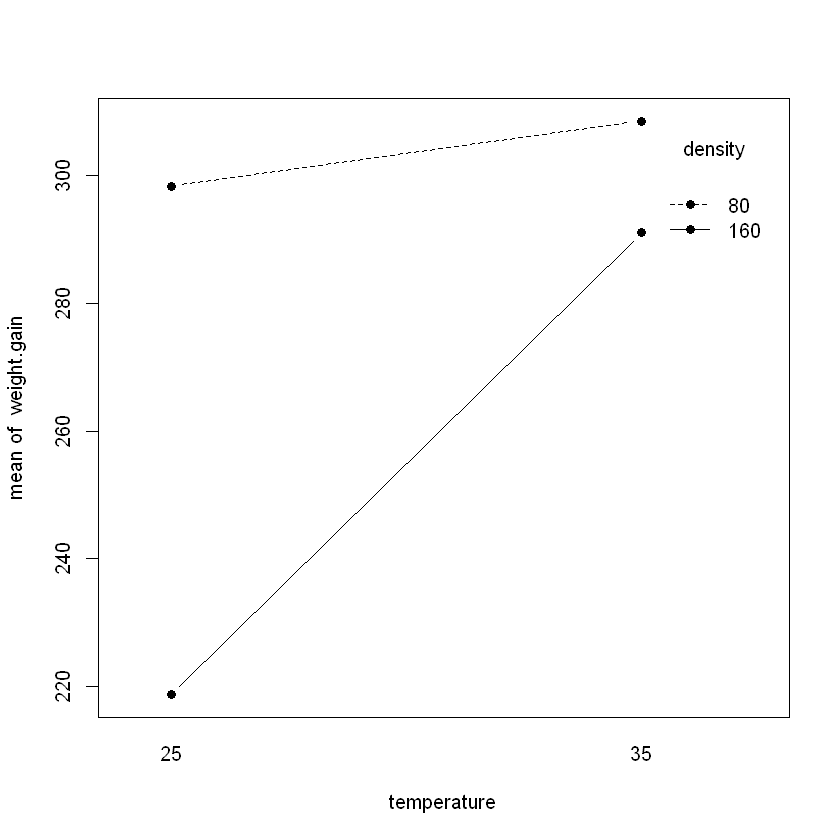

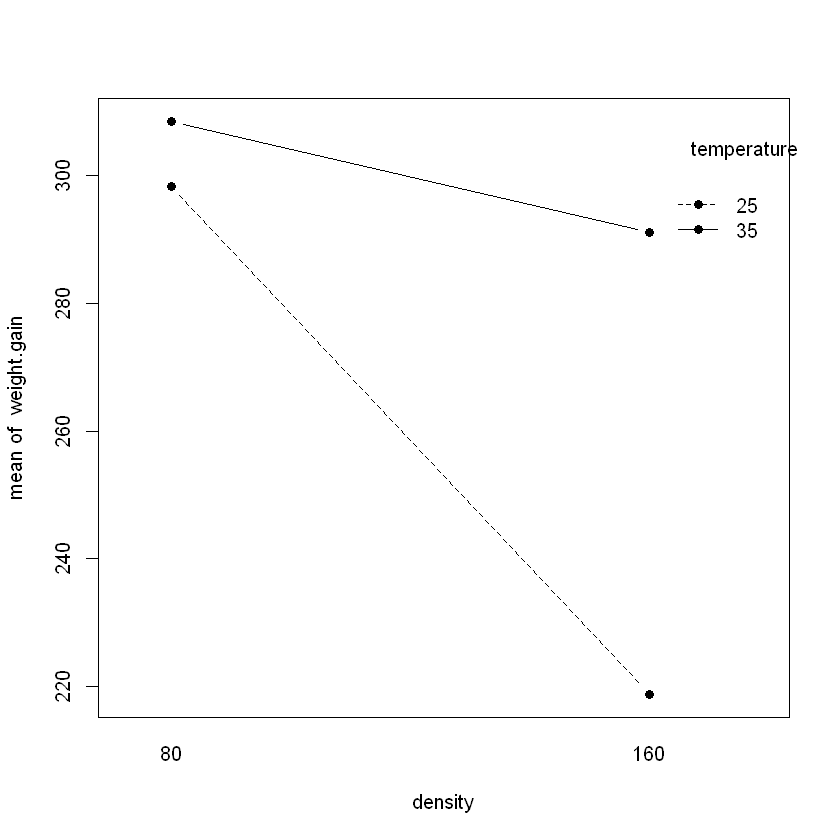

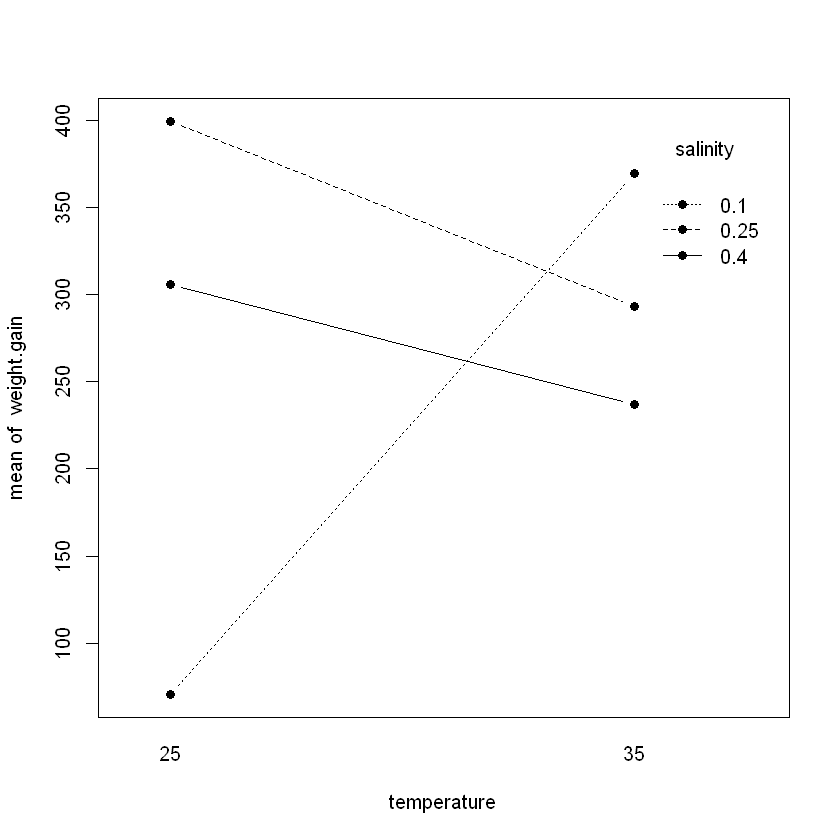

In [ ]:
# Check interactions by plotting the factors
interaction.plot(density,salinity,weight.gain,type="b",pch=19,fixed=T)
interaction.plot(salinity,density,weight.gain,type="b",pch=19,fixed=T)
interaction.plot(temperature,density,weight.gain,type="b",pch=19,fixed=T)
interaction.plot(density,temperature,weight.gain,type="b",pch=19,fixed=T)
interaction.plot(temperature,salinity,weight.gain,type="b",pch=19,fixed=T)

There is one area of interaction between temp and salinity. Temperature interactions with salinity when going from 25 to 30 for salinity 0.1. This interacts with both salinity 0.25 and 0.4

In [ ]:
# Check the means at each level given each factor
model.tables(model5, type="means")

Tables of means
Grand mean
         
279.1667 

 salinity 
salinity
  0.1  0.25   0.4 
220.0 346.2 271.2 

 density 
density
    80    160 
303.44 254.89 

 temperature 
temperature
    25     35 
258.50 299.83 

 salinity:density 
        density
salinity 80    160  
    0.1  239.2 200.8
    0.25 370.2 322.3
    0.4  301.0 241.5

 salinity:temperature 
        temperature
salinity 25    35   
    0.1   70.5 369.5
    0.25 399.3 293.2
    0.4  305.7 236.8

 density:temperature 
       temperature
density 25     35    
    80  298.33 308.56
    160 218.67 291.11

 salinity:density:temperature 
, , temperature = 25

        density
salinity 80    160  
    0.1   70.3  70.7
    0.25 465.7 333.0
    0.4  359.0 252.3

, , temperature = 35

        density
salinity 80    160  
    0.1  408.0 331.0
    0.25 274.7 311.7
    0.4  243.0 230.7


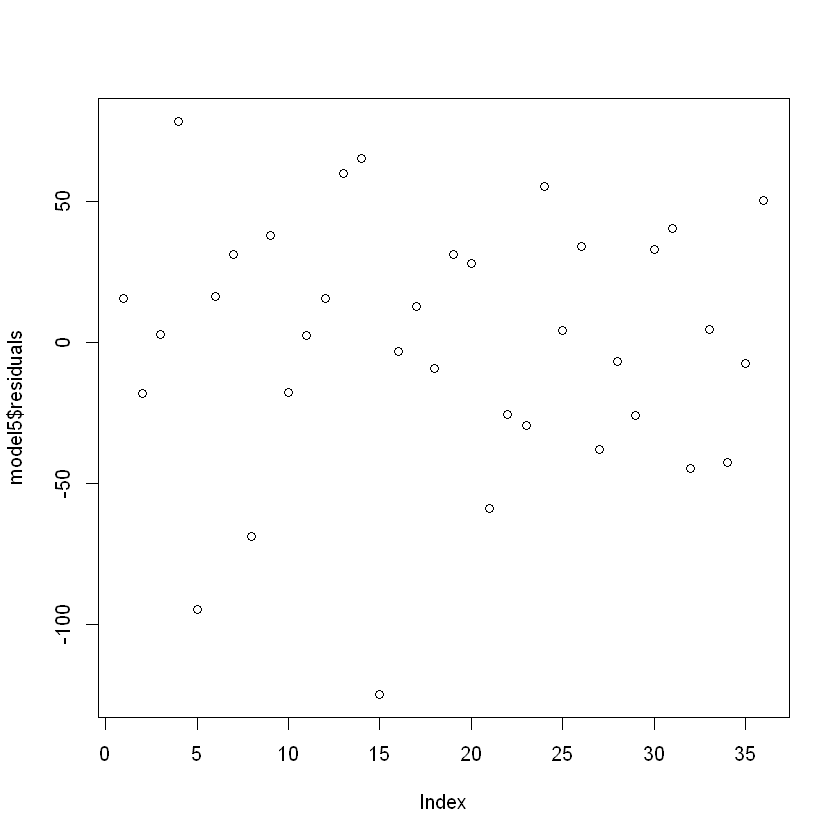

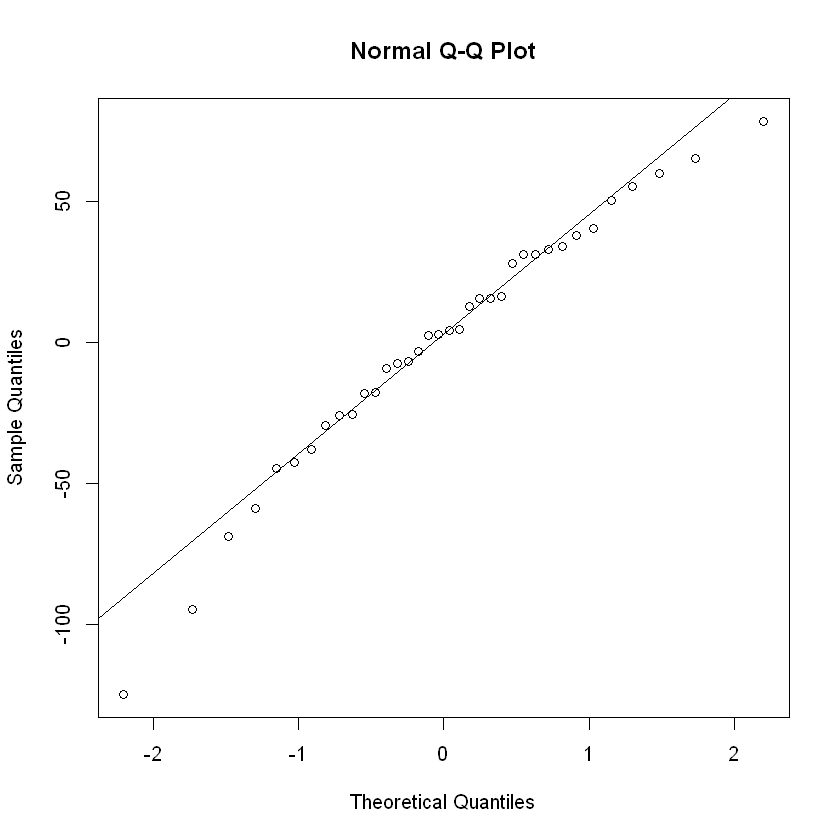

In [ ]:
# Check for model adequacy by plotting the residuals and the QQ of the residuals
plot(model5$residuals)
qqnorm(model5$residuals)
qqline(model5$residuals)

The residuals look good. They look random and normal.

**Build regression model with interactions (including 2-way and 3-way interactions). Check main factors significant.**

Main factors that are significant are salinity, temperature, and density as main effects and salinity:temperature as an interaction term. Also salinity:density:temperature as a three way factor is significant at the 0.05 alpha level

**Are the interactions significant? Build a reduced model if necessary.**

Yes the interactions are very significant. The most significant interactions given the summary of the linear model are salinity.025:temperature35 and salinity.4:temperature35. The three way factor salinity0.25:density160:temperature35 is also very significant.

**Check interactions( 2-way and 3-way) significance by plots. Confirm results with part (a)**

Given the interaction output plots we can confirm results from part a.

**Find the combination of Temp, Density, Salinity which produces the shrimp largest weight gain**

The combination that produces the largest weight gain in shrimp is temperature=25,density=80,salinity=0.25

**Perform 3-part residual check.**

When checking the residuals they appear to be random and structureless. The QQ plot of the residuals shows adequate normality

-----------------------------------------------------------------------------------------------------------------

**Question 6**

In [ ]:
# Read in data. Construct data frame and needed vectors
data6  <- read.csv('Mid Term Question 6.csv')
head(data6)
oil <- factor(data6$Oil)
truck <- data6$Truck
consumption <- data6$Fuel.Consumption

Oil,Truck,Fuel.Consumption
1,1,0.500
1,2,0.634
1,3,0.487
1,4,0.329
1,5,0.512
2,1,0.535


In [ ]:
# Construct the model and its summaries
model6 <- aov(consumption ~ oil + truck + oil*truck)
model6
summary(model6)
summary.lm(model6)

Call:
   aov(formula = consumption ~ oil + truck + oil * truck)

Terms:
                       oil      truck  oil:truck  Residuals
Sum of Squares  0.00670573 0.01689813 0.00032807 0.07909580
Deg. of Freedom          2          1          2          9

Residual standard error: 0.09374659
Estimated effects may be unbalanced

            Df  Sum Sq  Mean Sq F value Pr(>F)
oil          2 0.00671 0.003353   0.382  0.693
truck        1 0.01690 0.016898   1.923  0.199
oil:truck    2 0.00033 0.000164   0.019  0.982
Residuals    9 0.07910 0.008788               


Call:
aov(formula = consumption ~ oil + truck + oil * truck)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13530 -0.05030 -0.01320  0.06135  0.11350 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.57670    0.09832   5.865 0.000239 ***
oil2         0.03330    0.13905   0.239 0.816095    
oil3        -0.01520    0.13905  -0.109 0.915352    
truck       -0.02810    0.02965  -0.948 0.367948    
oil2:truck   0.00510    0.04192   0.122 0.905852    
oil3:truck   0.00800    0.04192   0.191 0.852903    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09375 on 9 degrees of freedom
Multiple R-squared:  0.2323,	Adjusted R-squared:  -0.1942 
F-statistic: 0.5446 on 5 and 9 DF,  p-value: 0.7393


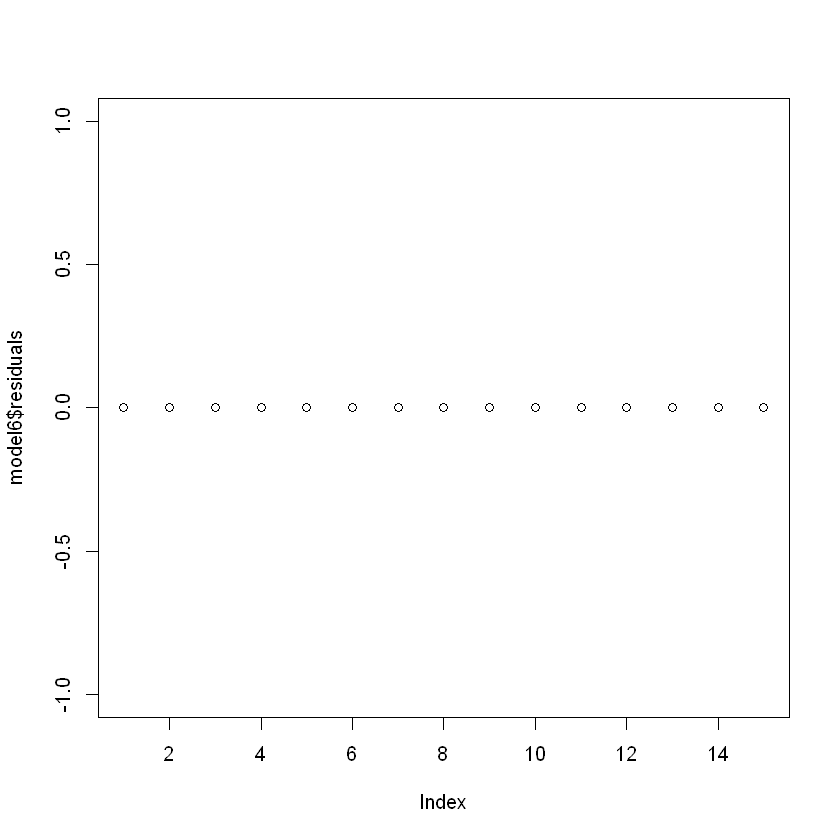

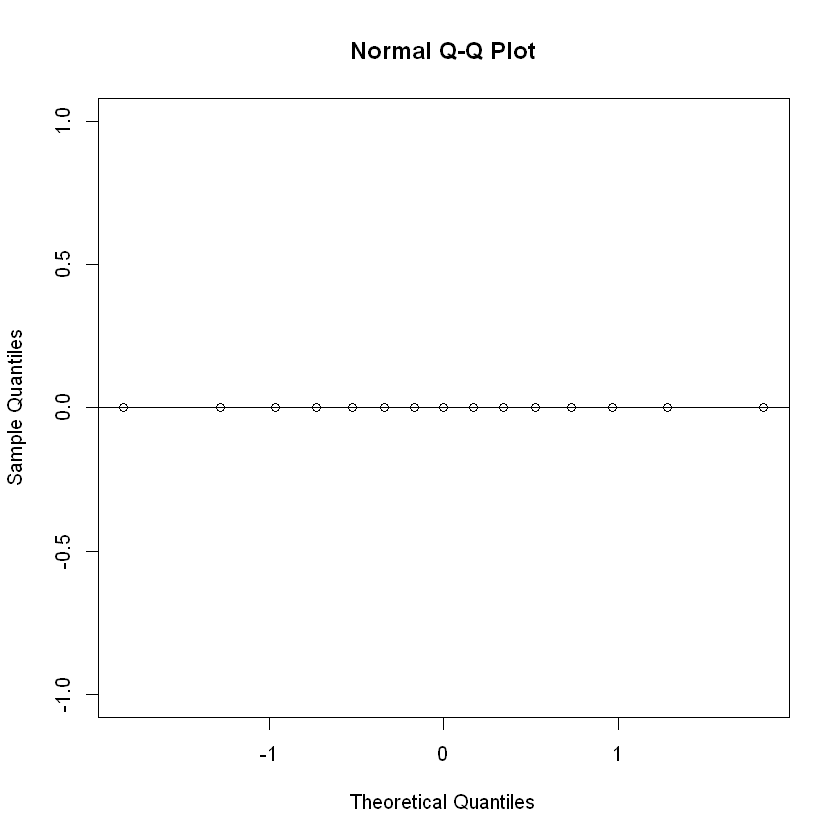

In [ ]:
# Check for model adequacy by plotting the residuals and the QQ of the residuals
plot(model6$residuals)
qqnorm(model6$residuals)
qqline(model6$residuals)

In [ ]:
# Construct the model and its summaries
model6.1 <- aov(consumption ~ oil + truck)
model6.1
summary(model6.1)
summary.lm(model6.1)

Call:
   aov(formula = consumption ~ oil + truck)

Terms:
                       oil      truck  Residuals
Sum of Squares  0.00670573 0.01689813 0.07942387
Deg. of Freedom          2          1         11

Residual standard error: 0.08497265
Estimated effects may be unbalanced

            Df  Sum Sq  Mean Sq F value Pr(>F)
oil          2 0.00671 0.003353   0.464  0.640
truck        1 0.01690 0.016898   2.340  0.154
Residuals   11 0.07942 0.007220               


Call:
aov(formula = consumption ~ oil + truck)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13967 -0.04667 -0.01320  0.06167  0.11787 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.56360    0.06008   9.380  1.4e-06 ***
oil2         0.04860    0.05374   0.904    0.385    
oil3         0.00880    0.05374   0.164    0.873    
truck       -0.02373    0.01551  -1.530    0.154    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08497 on 11 degrees of freedom
Multiple R-squared:  0.2291,	Adjusted R-squared:  0.01886 
F-statistic:  1.09 on 3 and 11 DF,  p-value: 0.394


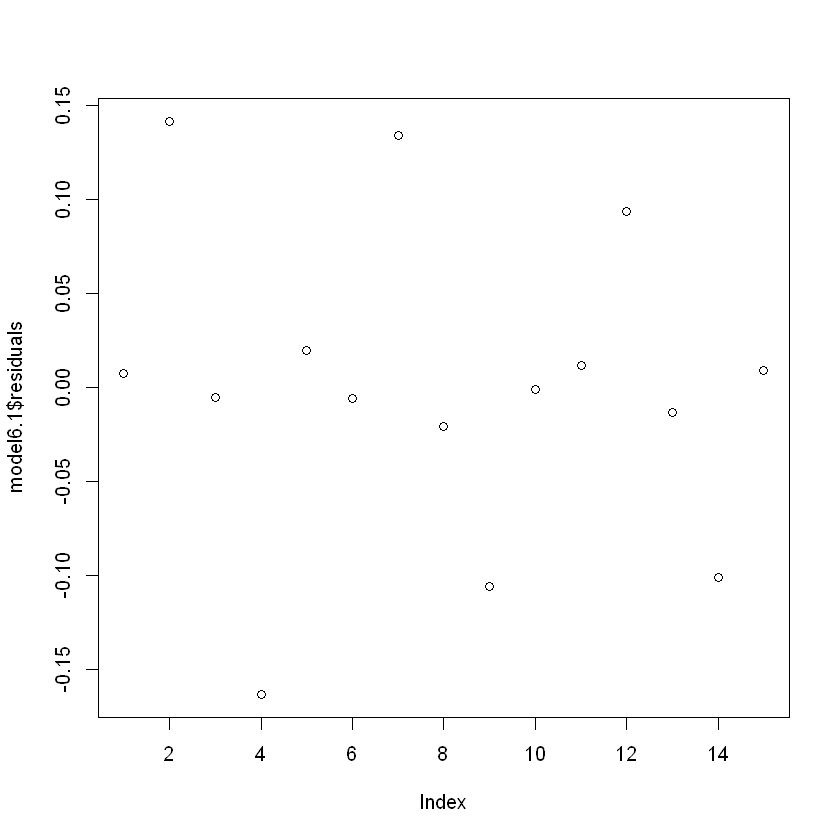

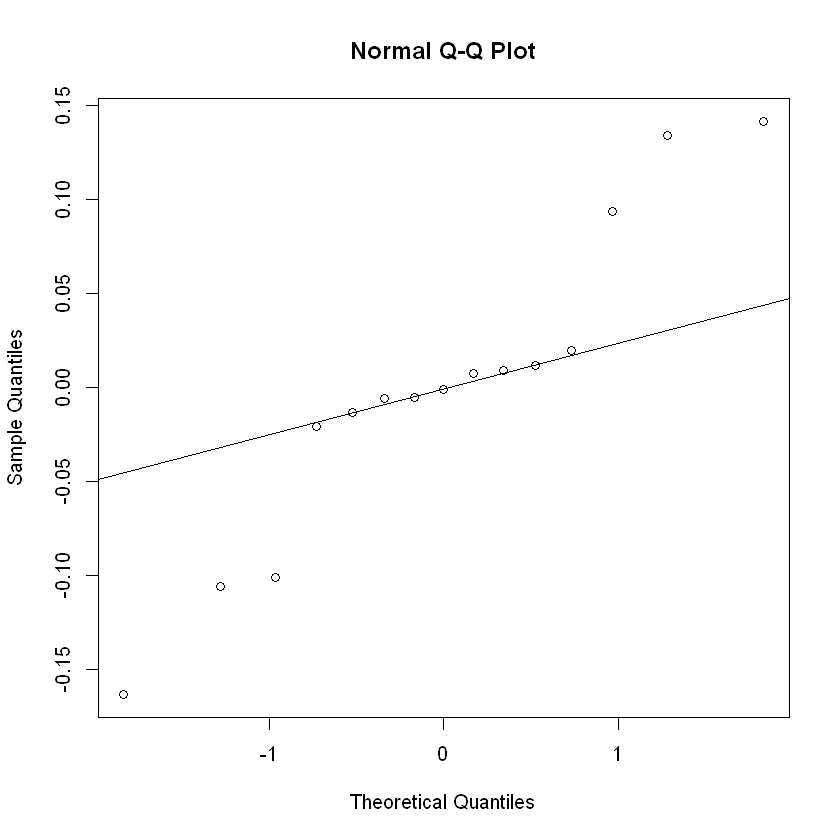

In [ ]:
# Check for model adequacy by plotting the residuals and the QQ of the residuals
plot(model6.1$residuals)
qqnorm(model6.1$residuals)
qqline(model6.1$residuals)

In [ ]:
# Construct the model and its summaries
model6.2 <- aov(consumption ~ oil)
model6.2
summary(model6.2)
summary.lm(model6.2)

Call:
   aov(formula = consumption ~ oil)

Terms:
                       oil  Residuals
Sum of Squares  0.00670573 0.09632200
Deg. of Freedom          2         12

Residual standard error: 0.0895926
Estimated effects may be unbalanced

            Df  Sum Sq  Mean Sq F value Pr(>F)
oil          2 0.00671 0.003353   0.418  0.668
Residuals   12 0.09632 0.008027               


Call:
aov(formula = consumption ~ oil)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1634 -0.0171 -0.0010  0.0157  0.1416 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.49240    0.04007  12.289 3.71e-08 ***
oil2         0.04860    0.05666   0.858    0.408    
oil3         0.00880    0.05666   0.155    0.879    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08959 on 12 degrees of freedom
Multiple R-squared:  0.06509,	Adjusted R-squared:  -0.09073 
F-statistic: 0.4177 on 2 and 12 DF,  p-value: 0.6678


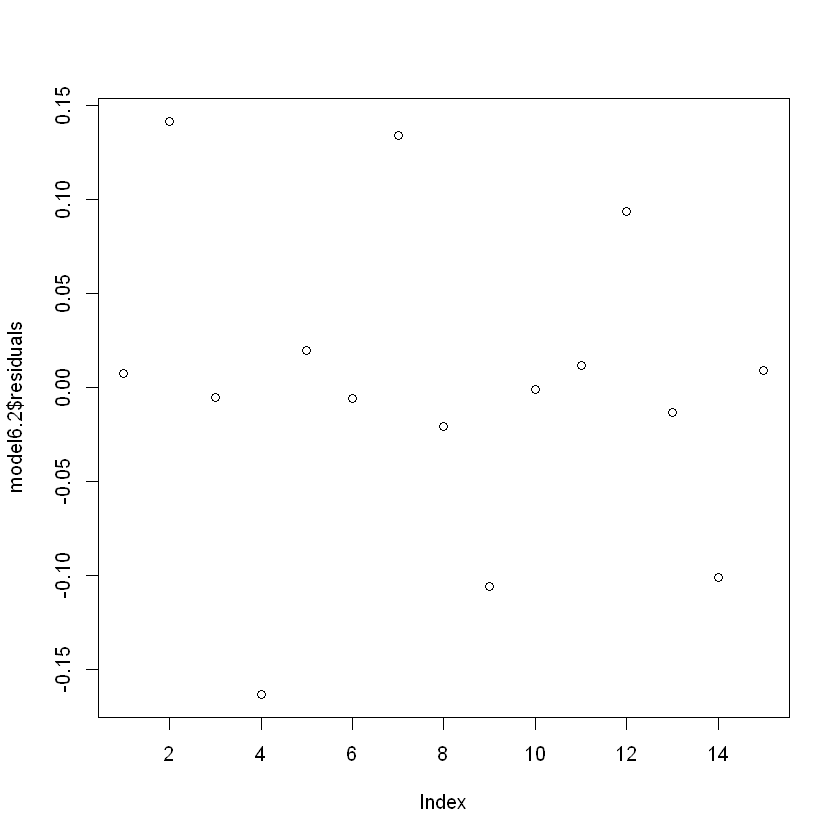

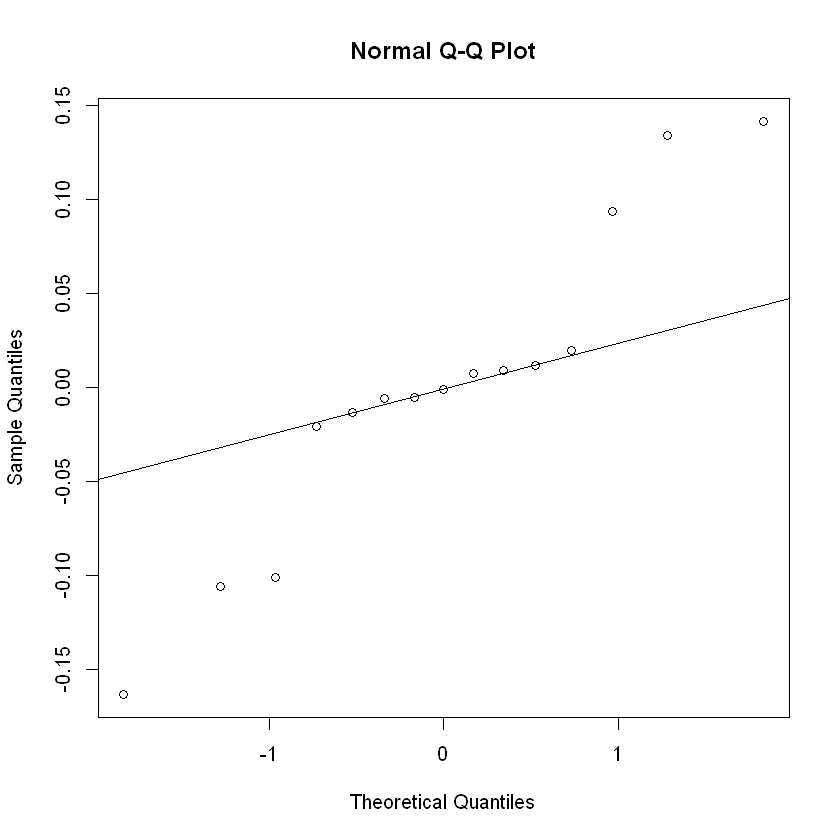

In [ ]:
# Check for model adequacy by plotting the residuals and the QQ of the residuals
plot(model6.2$residuals)
qqnorm(model6.2$residuals)
qqline(model6.2$residuals)

In [ ]:
# Construct the model and its summaries
model6.3 <- aov(consumption ~ truck)
model6.3
summary(model6.3)
summary.lm(model6.3)

Call:
   aov(formula = consumption ~ truck)

Terms:
                     truck  Residuals
Sum of Squares  0.01689813 0.08612960
Deg. of Freedom          1         13

Residual standard error: 0.08139628
Estimated effects may be unbalanced

            Df  Sum Sq  Mean Sq F value Pr(>F)
truck        1 0.01690 0.016898   2.551  0.134
Residuals   13 0.08613 0.006625               


Call:
aov(formula = consumption ~ truck)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.15880 -0.04940 -0.02353  0.05383  0.13973 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.58273    0.04929  11.823  2.5e-08 ***
truck       -0.02373    0.01486  -1.597    0.134    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0814 on 13 degrees of freedom
Multiple R-squared:  0.164,	Adjusted R-squared:  0.09971 
F-statistic: 2.551 on 1 and 13 DF,  p-value: 0.1343


In [ ]:
# Check the means at each level given each factor
model.tables(model6, type="means")

Warning message in replications(paste("~", xx), data = mf):
"non-factors ignored: truck"Warning message in replications(paste("~", xx), data = mf):
"non-factors ignored: oil, truck"

Tables of means
Grand mean
          
0.5115333 

 oil 
oil
     1      2      3 
0.4924 0.5410 0.5012 

 truck 
truck
     1      2      3      4      5 
0.5590 0.5353 0.5115 0.4878 0.4641 

 oil:truck 
   truck
oil 1      2      3      4      5     
  1 0.5486 0.5205 0.4924 0.4643 0.4362
  2 0.5870 0.5640 0.5410 0.5180 0.4950
  3 0.5414 0.5213 0.5012 0.4811 0.4610

**Build a linear model. Is there any significant difference of means about the oil types.**

No there does not appear to be any significant differences among the means of the oil types. In fact given several models tested nothing seems to be of particular significance

**Which oil type gives the lowest fuel consumption.**

Just looking at oil on its own type 1 gives the lowest consumption. When looking at oil given truck the lowest is oil type 1, truck type 5

**Use Truck as a Blocking factor. Is the Blocking factor effective?**

No. Truck is not a significant factor.

**Do a complete residual assumption check.**

The full model doesn't produces any kind of residuals that seem to show adequacy at all. The two reduced models do show some adequacy but normality appears to be lacking.

-----------------------------------------------------------------------------------------------------------------

**Question 7**

An article in the *Fire Safety Journal* describes an experiment in which a shape factor was determined for several different nozzle designs at six levels of jet efflux velocity. Interest focused on potential differences between nozzle designs, with velocity considered as a nuisnace variable. The data are shown below:

Set up a data frame named "nozzles"

In [ ]:
# Call data from the working directory
data7  <- read.csv('Mid Term Question 7.csv')
head(data7)

Nozzle.Design,Jet.Velocity,Shape
1,11.73,0.78
1,14.37,0.80
1,16.59,0.81
1,20.43,0.75
1,23.46,0.77
1,28.74,0.78


In [ ]:
# Construct the data frame along with the neede vectors
nozzles <- data7
shape <- nozzles$Shape
jet <- nozzles$Jet.Velocity
design <- factor(nozzles$Nozzle.Design)

In [ ]:
# Construct the model and its summaries
model7 <- aov(shape ~ jet + design + jet*design)
model7
summary(model7)
summary.lm(model7)

Call:
   aov(formula = shape ~ jet + design + jet * design)

Terms:
                       jet     design jet:design  Residuals
Sum of Squares  0.05531449 0.10218000 0.03054417 0.03430801
Deg. of Freedom          1          4          4         20

Residual standard error: 0.04141739
Estimated effects may be unbalanced

            Df  Sum Sq Mean Sq F value   Pr(>F)    
jet          1 0.05531 0.05531  32.246 1.48e-05 ***
design       4 0.10218 0.02555  14.892 8.55e-06 ***
jet:design   4 0.03054 0.00764   4.451   0.0098 ** 
Residuals   20 0.03431 0.00172                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Call:
aov(formula = shape ~ jet + design + jet * design)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.062838 -0.016441 -0.006209  0.013253  0.074468 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.806555   0.059236  13.616 1.41e-11 ***
jet         -0.001295   0.002954  -0.438  0.66579    
design2      0.098784   0.083773   1.179  0.25216    
design3      0.209887   0.083773   2.505  0.02099 *  
design4      0.450350   0.083773   5.376 2.91e-05 ***
design5      0.222399   0.083773   2.655  0.01521 *  
jet:design2 -0.001411   0.004177  -0.338  0.73907    
jet:design3 -0.004677   0.004177  -1.120  0.27616    
jet:design4 -0.015020   0.004177  -3.596  0.00181 ** 
jet:design5 -0.009924   0.004177  -2.376  0.02763 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04142 on 20 degrees of freedom
Multiple R-squared:  0.8457,	Adjusted R-squared:  0.7763 
F-statistic: 12.18 on 9 and 20 DF, 

In [ ]:
# Construct the reduced model and its summaries
model7.1 <- aov(shape ~ jet)
model7.1
summary(model7.1)
summary.lm(model7.1)

Call:
   aov(formula = shape ~ jet)

Terms:
                       jet  Residuals
Sum of Squares  0.05531449 0.16703218
Deg. of Freedom          1         28

Residual standard error: 0.07723623
Estimated effects may be unbalanced

            Df  Sum Sq Mean Sq F value  Pr(>F)   
jet          1 0.05531 0.05531   9.272 0.00502 **
Residuals   28 0.16703 0.00597                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Call:
aov(formula = shape ~ jet)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13485 -0.06285  0.01278  0.04274  0.22515 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.002839   0.049401  20.300  < 2e-16 ***
jet         -0.007501   0.002463  -3.045  0.00502 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07724 on 28 degrees of freedom
Multiple R-squared:  0.2488,	Adjusted R-squared:  0.2219 
F-statistic: 9.272 on 1 and 28 DF,  p-value: 0.005023


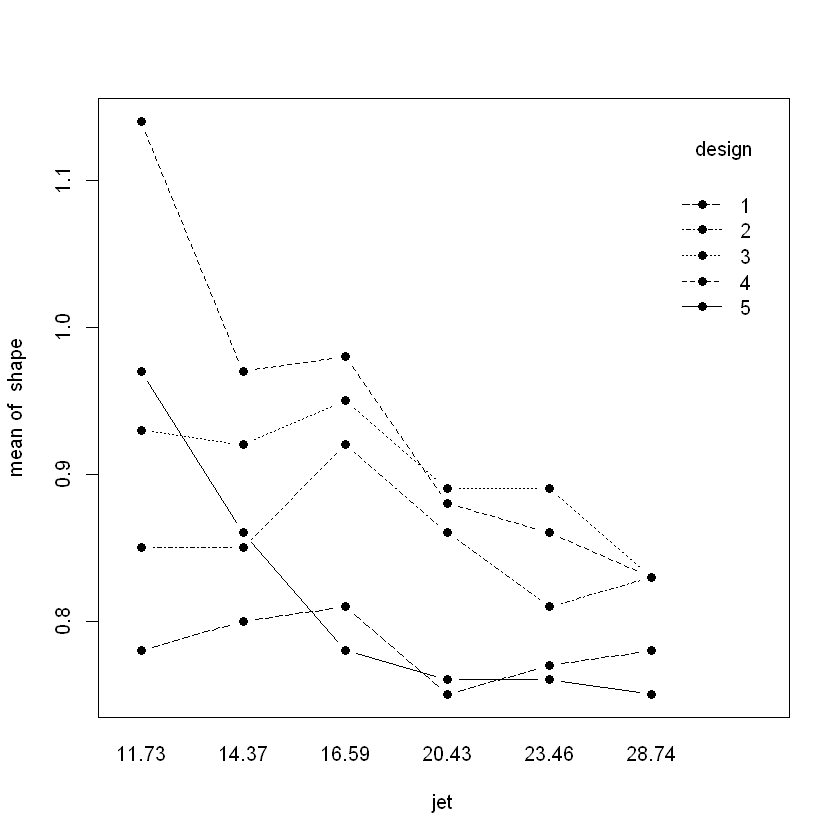

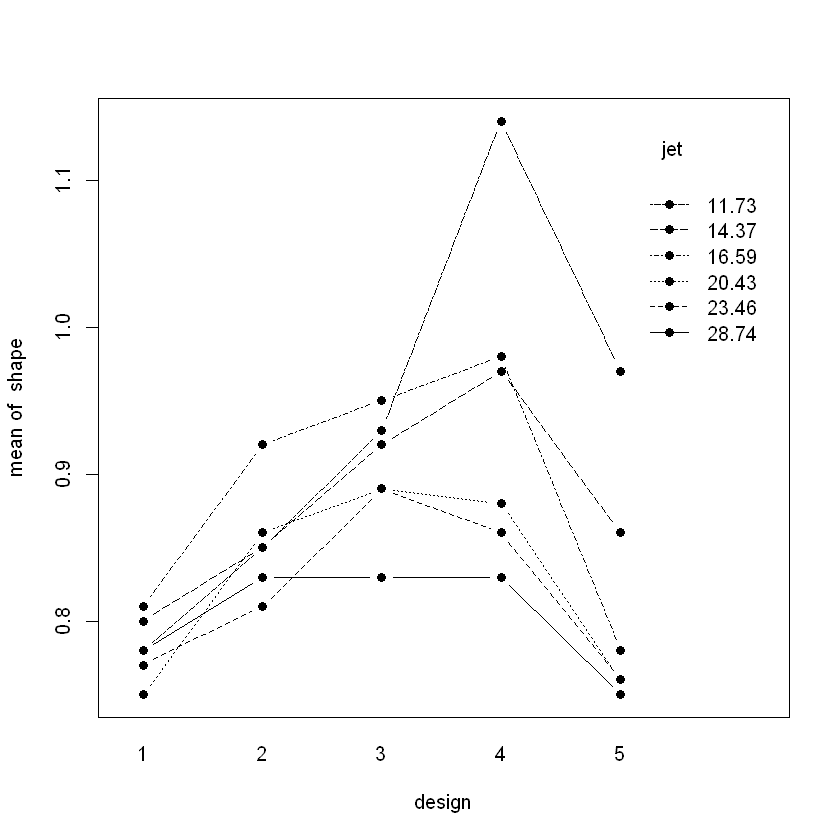

In [ ]:
# Check interactions by plotting the factors
interaction.plot(jet,design,shape,type="b",pch=19,fixed=T)
interaction.plot(design,jet,shape,type="b",pch=19,fixed=T)

This data is very messy. Lots of interactions.

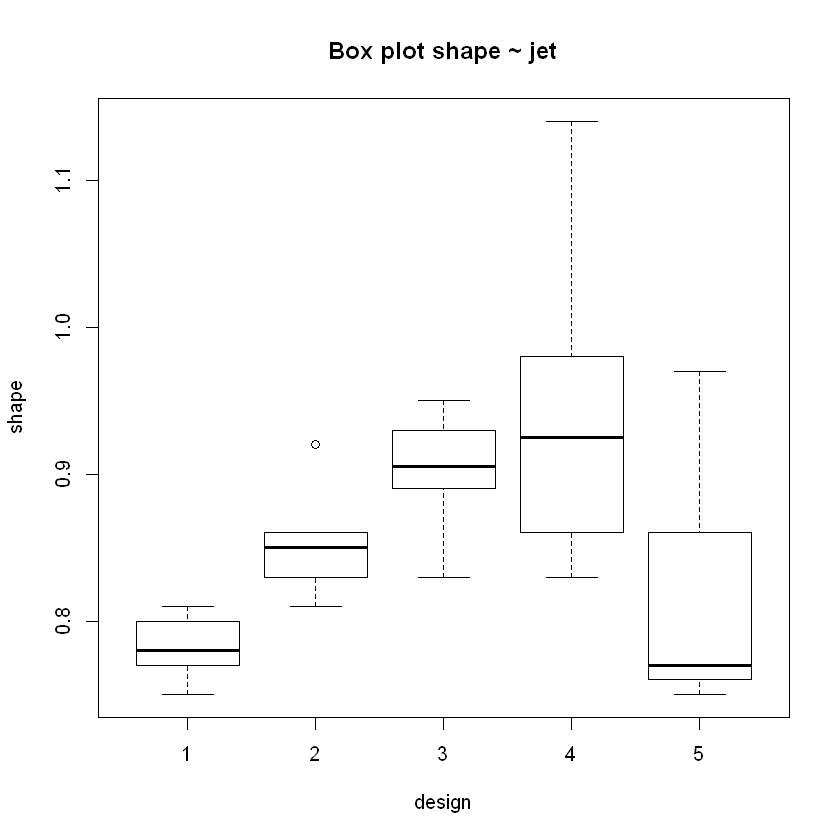

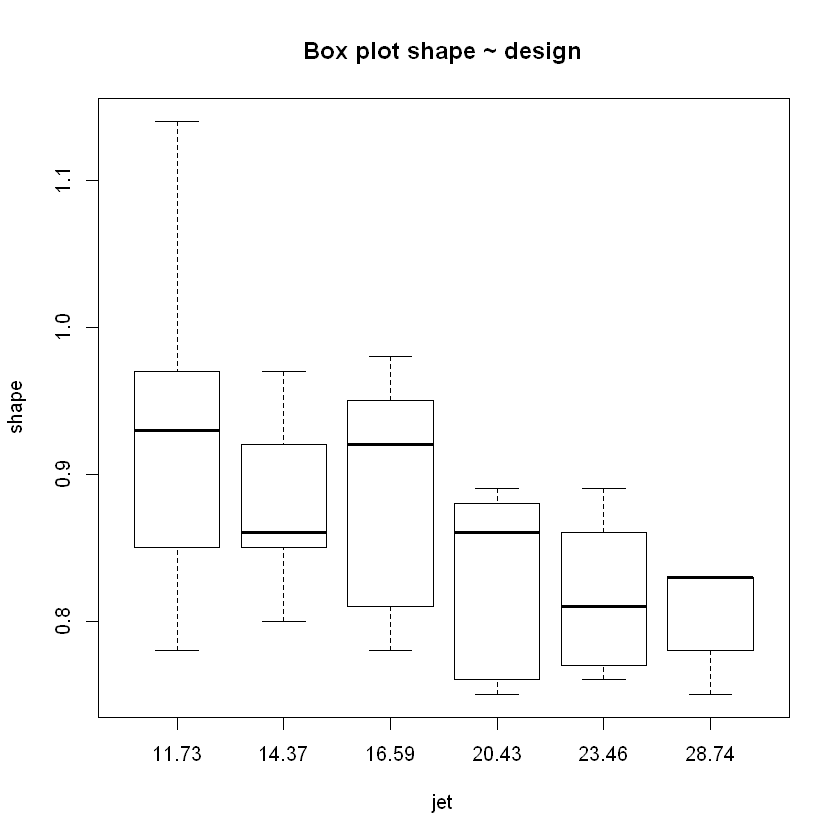

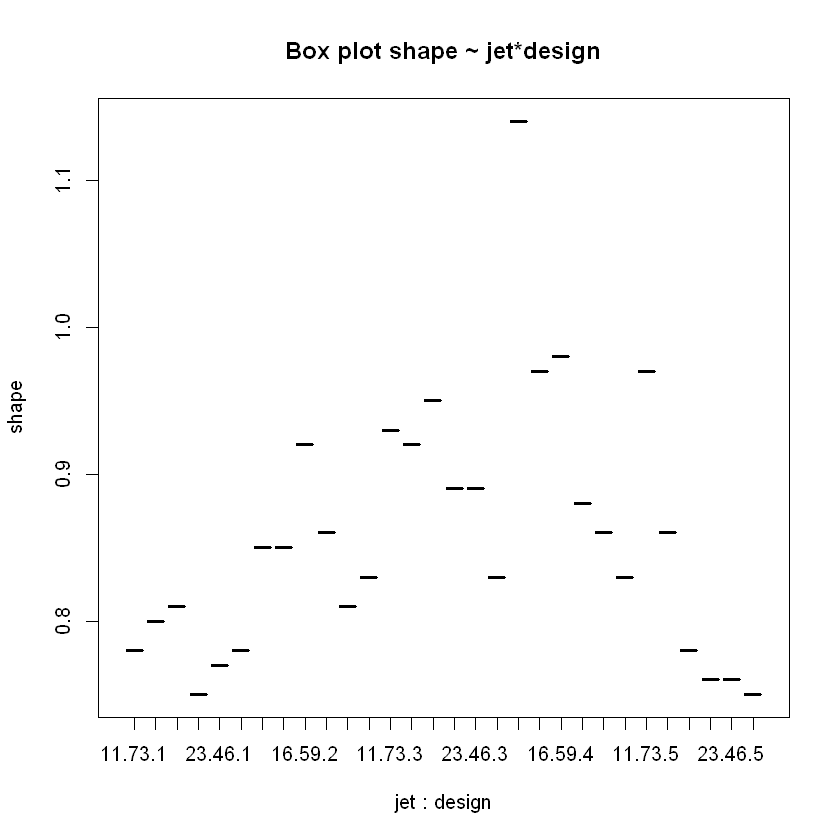

In [ ]:
# Explore the data using boxplots
boxplot(shape ~ design , main="Box plot shape ~ jet")
boxplot(shape ~ jet , main="Box plot shape ~ design")
boxplot(shape ~ jet*design , main="Box plot shape ~ jet*design")

In [ ]:
# Check the means at each level given each factor
# Do the same for the models effects
model.tables(model7,type="mean")
model.tables(model7,type="effects")

Warning message in replications(paste("~", xx), data = mf):
"non-factors ignored: jet"Warning message in replications(paste("~", xx), data = mf):
"non-factors ignored: jet, design"

Tables of means
Grand mean
          
0.8586667 

 jet 
jet
 11.73  14.37  16.59  20.43  23.46  28.74 
0.9149 0.8950 0.8784 0.8496 0.8269 0.7873 

 design 
design
     1      2      3      4      5 
0.7817 0.8533 0.9017 0.9433 0.8133 

 jet:design 
       design
jet     1      2      3      4      5     
  11.73 0.7914 0.8736 0.9464 1.0655 0.8974
  14.37 0.7879 0.8665 0.9306 1.0225 0.8677
  16.59 0.7851 0.8604 0.9174 0.9862 0.8428
  20.43 0.7801 0.8501 0.8944 0.9236 0.7998
  23.46 0.7762 0.8419 0.8763 0.8742 0.7658
  28.74 0.7693 0.8276 0.8448 0.7880 0.7065

Warning message in replications(paste("~", xx), data = mf):
"non-factors ignored: jet"Warning message in replications(paste("~", xx), data = mf):
"non-factors ignored: jet, design"

Tables of effects

 jet 
jet
   11.73    14.37    16.59    20.43    23.46    28.74 
 0.05618  0.03638  0.01973 -0.00908 -0.03181 -0.07141 

 design 
design
       1        2        3        4        5 
-0.07700 -0.00533  0.04300  0.08467 -0.04533 

 jet:design 
       design
jet     1        2        3        4        5       
  11.73 -0.04648 -0.03592 -0.01146  0.06601  0.02784
  14.37 -0.03010 -0.02326 -0.00742  0.04275  0.01803
  16.59 -0.01632 -0.01261 -0.00402  0.02318  0.00978
  20.43  0.00751  0.00580  0.00185 -0.01066 -0.00450
  23.46  0.02631  0.02033  0.00649 -0.03737 -0.01576
  28.74  0.05908  0.04565  0.01456 -0.08391 -0.03539

Warning message in replications(paste("~", xx), data = mf):
"non-factors ignored: jet"Warning message in replications(paste("~", xx), data = mf):
"non-factors ignored: jet, design"Warning message in TukeyHSD.aov(model7):
"'which' specified some non-factors which will be dropped"

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = shape ~ jet + design + jet * design)

$design
           diff           lwr         upr     p adj
2-1  0.07166667  0.0001119781  0.14322136 0.0495231
3-1  0.12000000  0.0484453114  0.19155469 0.0005657
4-1  0.16166667  0.0901119781  0.23322136 0.0000128
5-1  0.03166667 -0.0398880219  0.10322136 0.6799265
3-2  0.04833333 -0.0232213552  0.11988802 0.2920748
4-2  0.09000000  0.0184453114  0.16155469 0.0095480
5-2 -0.04000000 -0.1115546886  0.03155469 0.4716948
4-3  0.04166667 -0.0298880219  0.11322136 0.4322282
5-3 -0.08833333 -0.1598880219 -0.01677864 0.0111418
5-4 -0.13000000 -0.2015546886 -0.05844531 0.0002221


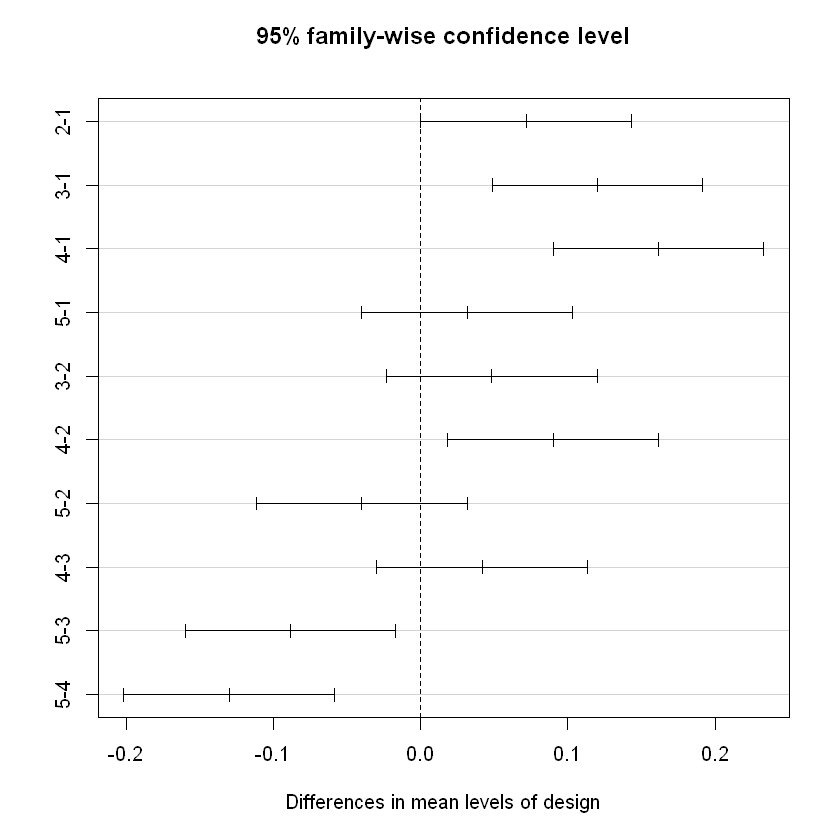

In [ ]:
# Construct the Tukey table and then plot the family-wise CI
Tukey <- TukeyHSD(model7)
Tukey
plot(Tukey)

In [ ]:
# Take a more detailed look at the model by constructing the LSD on the model
LSD7 <- LSD.test(model7, c("jet", "design"), console=T)
LSD7


Study: model7 ~ c("jet", "design")

LSD t Test for shape 

Mean Square Error:  0.001715401 

jet:design,  means and individual ( 95 %) CI

        shape std r       LCL       UCL  Min  Max
11.73:1  0.78  NA 1 0.6936048 0.8663952 0.78 0.78
11.73:2  0.85  NA 1 0.7636048 0.9363952 0.85 0.85
11.73:3  0.93  NA 1 0.8436048 1.0163952 0.93 0.93
11.73:4  1.14  NA 1 1.0536048 1.2263952 1.14 1.14
11.73:5  0.97  NA 1 0.8836048 1.0563952 0.97 0.97
14.37:1  0.80  NA 1 0.7136048 0.8863952 0.80 0.80
14.37:2  0.85  NA 1 0.7636048 0.9363952 0.85 0.85
14.37:3  0.92  NA 1 0.8336048 1.0063952 0.92 0.92
14.37:4  0.97  NA 1 0.8836048 1.0563952 0.97 0.97
14.37:5  0.86  NA 1 0.7736048 0.9463952 0.86 0.86
16.59:1  0.81  NA 1 0.7236048 0.8963952 0.81 0.81
16.59:2  0.92  NA 1 0.8336048 1.0063952 0.92 0.92
16.59:3  0.95  NA 1 0.8636048 1.0363952 0.95 0.95
16.59:4  0.98  NA 1 0.8936048 1.0663952 0.98 0.98
16.59:5  0.78  NA 1 0.6936048 0.8663952 0.78 0.78
20.43:1  0.75  NA 1 0.6636048 0.8363952 0.75 0.75
20.43:2  0

$statistics
      MSerror Df      Mean       CV  t.value       LSD
  0.001715401 20 0.8586667 4.823454 2.085963 0.1221812

$parameters
        test p.ajusted     name.t ntr alpha
  Fisher-LSD      none jet:design  30  0.05

$means
        shape std r       LCL       UCL  Min  Max  Q25  Q50  Q75
11.73:1  0.78  NA 1 0.6936048 0.8663952 0.78 0.78 0.78 0.78 0.78
11.73:2  0.85  NA 1 0.7636048 0.9363952 0.85 0.85 0.85 0.85 0.85
11.73:3  0.93  NA 1 0.8436048 1.0163952 0.93 0.93 0.93 0.93 0.93
11.73:4  1.14  NA 1 1.0536048 1.2263952 1.14 1.14 1.14 1.14 1.14
11.73:5  0.97  NA 1 0.8836048 1.0563952 0.97 0.97 0.97 0.97 0.97
14.37:1  0.80  NA 1 0.7136048 0.8863952 0.80 0.80 0.80 0.80 0.80
14.37:2  0.85  NA 1 0.7636048 0.9363952 0.85 0.85 0.85 0.85 0.85
14.37:3  0.92  NA 1 0.8336048 1.0063952 0.92 0.92 0.92 0.92 0.92
14.37:4  0.97  NA 1 0.8836048 1.0563952 0.97 0.97 0.97 0.97 0.97
14.37:5  0.86  NA 1 0.7736048 0.9463952 0.86 0.86 0.86 0.86 0.86
16.59:1  0.81  NA 1 0.7236048 0.8963952 0.81 0.81 0.81

**Build a linear model, nozzle as a blocking factor. Does the nozzle design affect the shape factor? Use 𝛼 = .05.**

Yes. 

Nozzle Design has a p-value with significance at 𝛼 = .05

**Is nozzle Blocking factor effective?**

Yes.

If we run the aov with just Jet Velocity as the factor then the signifiance is lower than if we use Nozzle Design as a blocking factor which results in 

**Which nozzle designs are different with respect to the shape factor? [Hint: use Tukey HSD]**

From the Tukey plot output it appears that design 1 and 2 are significantly different with respect to shape factor.

**Is the velocity effect significant?**

Yes.

From the aov summary output we can see that jet does cause a statistically significant variance. From the summary.lm we can see that this effect is most likely coming from the interaction between design 4 and 5 with jet velocity.

-----------------------------------------------------------------------------------------------------------------

**Question 8**

The yield of a chemical process is being studied. The two factors of interest are temperature and pressure. Three levels of each factor are selected; however, only nine runs can be made in one day. The experimenter runs a complete replicate of the design on each day. The data are shown in the following table. Analyze the data assuming that the days are blocks.

Set up a data frame named "chemprocess".

In [ ]:
# Read in data from the working directory. Create the data frame and needed vectors
data8  <- read.csv('Mid Term Question 8.csv')
head(data8)
chemprocess <- data8
day <- factor(chemprocess$Day)
pressure <- chemprocess$Pressure
temp <- factor(chemprocess$Temperature)
yield <- chemprocess$Yield

Day,Pressure,Temperature,Yield
1,250,Low,86.3
1,260,Low,84.0
1,270,Low,85.8
1,250,Medium,88.5
1,260,Medium,87.3
1,270,Medium,89.0


In [ ]:
# Construct the model and output its summaries
model8 <- aov(yield ~ day + pressure + temp + day*pressure*temp)
model8
summary(model8)
summary.lm(model8)
anova(model8)

Call:
   aov(formula = yield ~ day + pressure + temp + day * pressure * 
    temp)

Terms:
                     day pressure     temp day:pressure day:temp pressure:temp
Sum of Squares  13.00500  3.30750 99.85444      0.30083  2.54333       1.71500
Deg. of Freedom        1        1        2            1        2             2
                day:pressure:temp Residuals
Sum of Squares            0.47167   5.87167
Deg. of Freedom                 2         6

Residual standard error: 0.9892478
Estimated effects may be unbalanced

                  Df Sum Sq Mean Sq F value   Pr(>F)    
day                1  13.00   13.00  13.289 0.010765 *  
pressure           1   3.31    3.31   3.380 0.115631    
temp               2  99.85   49.93  51.018 0.000171 ***
day:pressure       1   0.30    0.30   0.307 0.599316    
day:temp           2   2.54    1.27   1.299 0.339721    
pressure:temp      2   1.72    0.86   0.876 0.463587    
day:pressure:temp  2   0.47    0.24   0.241 0.793107    
Residuals          6   5.87    0.98                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Call:
aov(formula = yield ~ day + pressure + temp + day * pressure * 
    temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3667 -0.1292  0.0000  0.4833  0.6833 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)  
(Intercept)               61.60000   18.19606   3.385   0.0148 *
day2                       5.26667   25.73312   0.205   0.8446  
pressure                   0.11000    0.06995   1.573   0.1669  
tempLow                   30.26667   25.73312   1.176   0.2841  
tempMedium                20.16667   25.73312   0.784   0.4630  
day2:pressure             -0.01000    0.09892  -0.101   0.9228  
day2:tempLow             -26.53333   36.39213  -0.729   0.4934  
day2:tempMedium           -8.86667   36.39213  -0.244   0.8156  
pressure:tempLow          -0.13500    0.09892  -1.365   0.2213  
pressure:tempMedium       -0.08500    0.09892  -0.859   0.4232  
day2:pressure:tempLow      0.09500    0.13990   0.679   0.5224  
day2:pressure:tempMedium   0.0

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
day,1,13.0050000,13.0050000,13.2892421,0.0107647212
pressure,1,3.3075000,3.3075000,3.3797900,0.1156309849
temp,2,99.8544444,49.9272222,51.0184502,0.0001712921
day:pressure,1,0.3008333,0.3008333,0.3074085,0.5993164076
day:temp,2,2.5433333,1.2716667,1.2994607,0.3397205492
pressure:temp,2,1.7150000,0.8575000,0.8762418,0.4635869151
day:pressure:temp,2,0.4716667,0.2358333,0.2409878,0.7931066251
Residuals,6,5.8716667,0.9786111,NA,NA


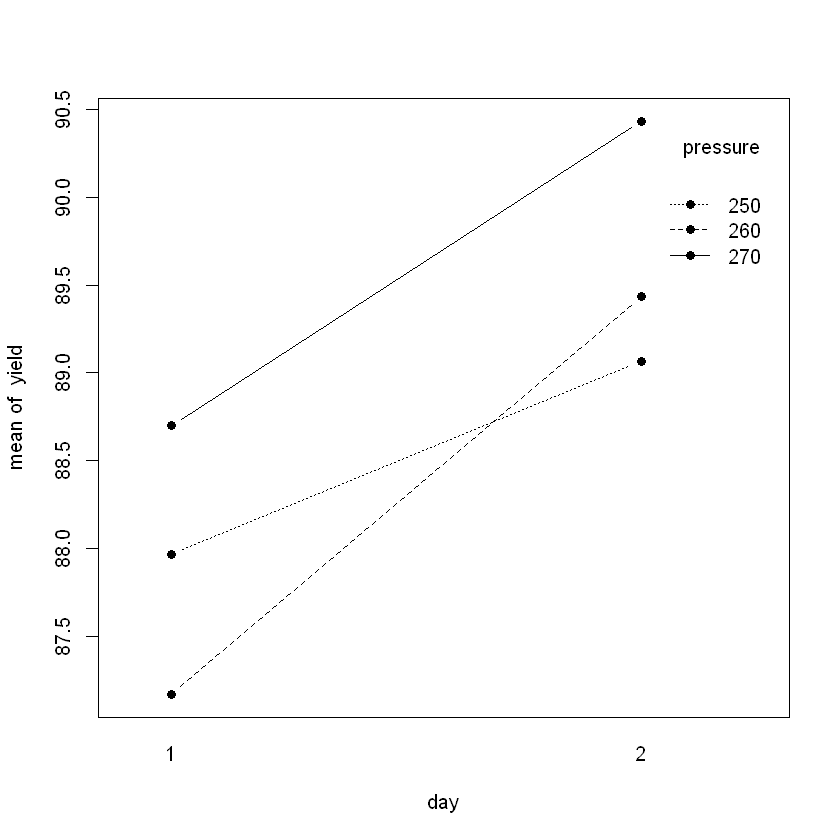

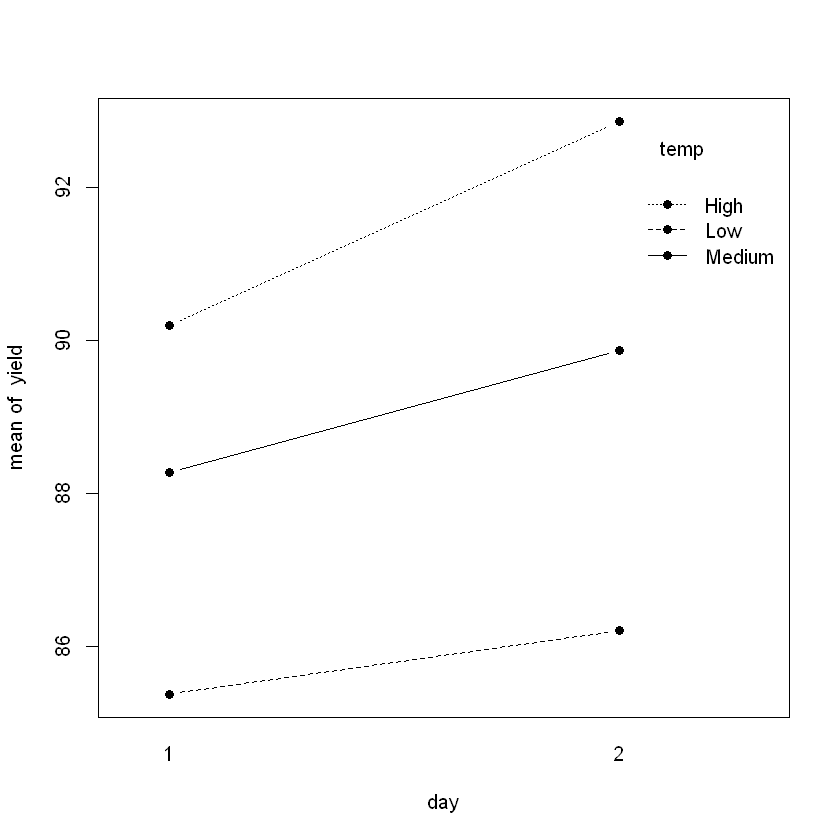

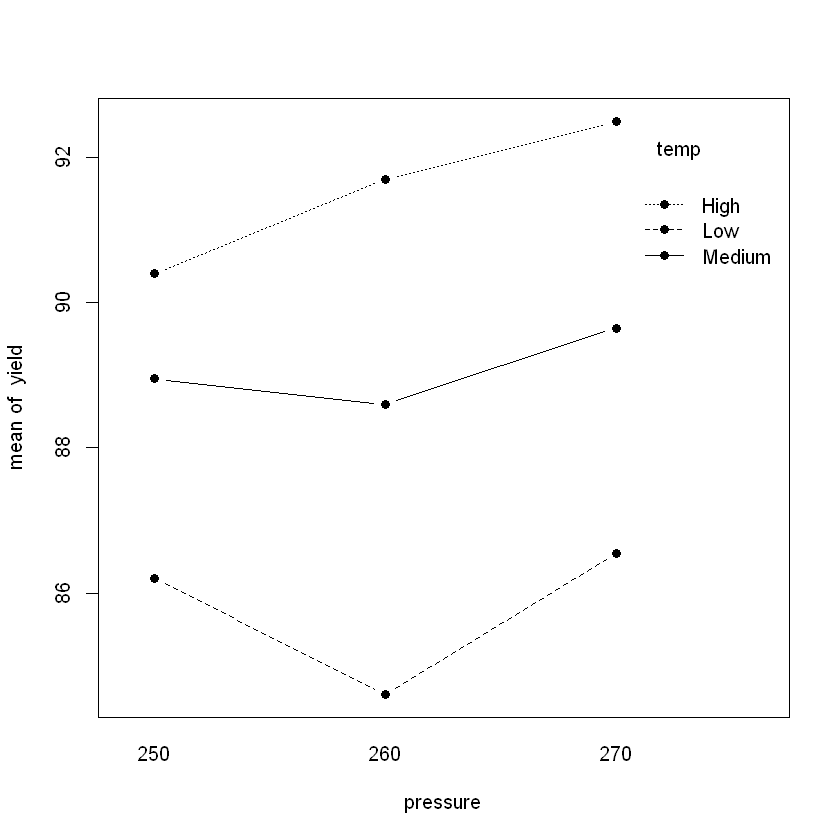

In [ ]:
# Check for interactions between factors using interactions plots
interaction.plot(day,pressure,yield,type="b",pch=19,fixed=T)
interaction.plot(day,temp,yield,type="b",pch=19,fixed=T)
interaction.plot(pressure,temp,yield,type="b",pch=19,fixed=T)

There does appear to be an interaction going on between day and pressure when day goes from 1 to 2 and pressure goes from 250 to 260

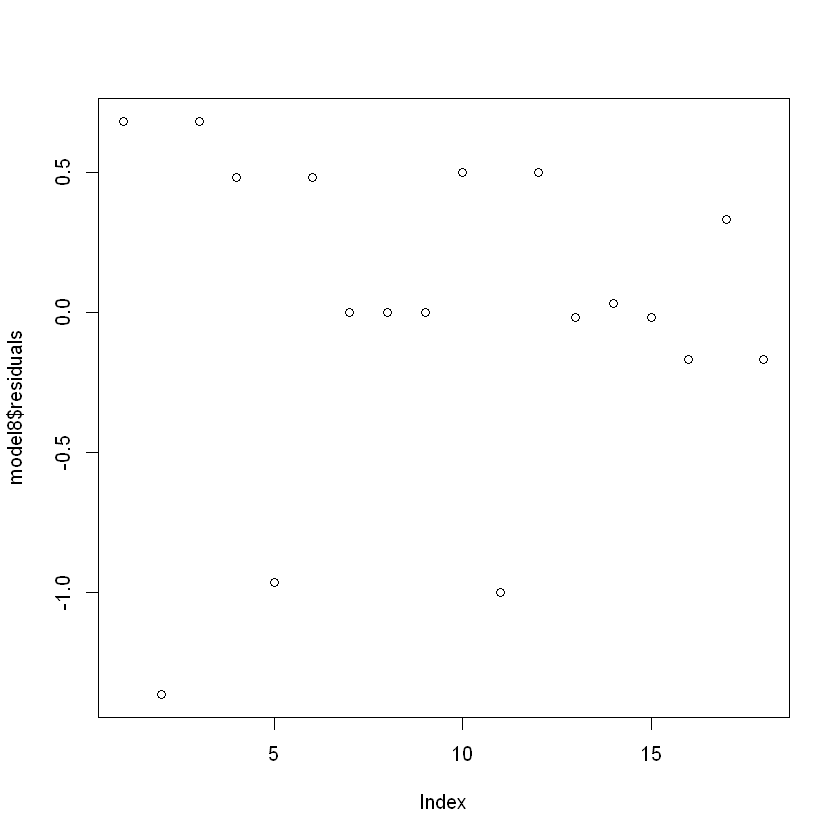


	Bartlett test of homogeneity of variances

data:  model8$residuals by temp
Bartlett's K-squared = 9.2226, df = 2, p-value = 0.009939


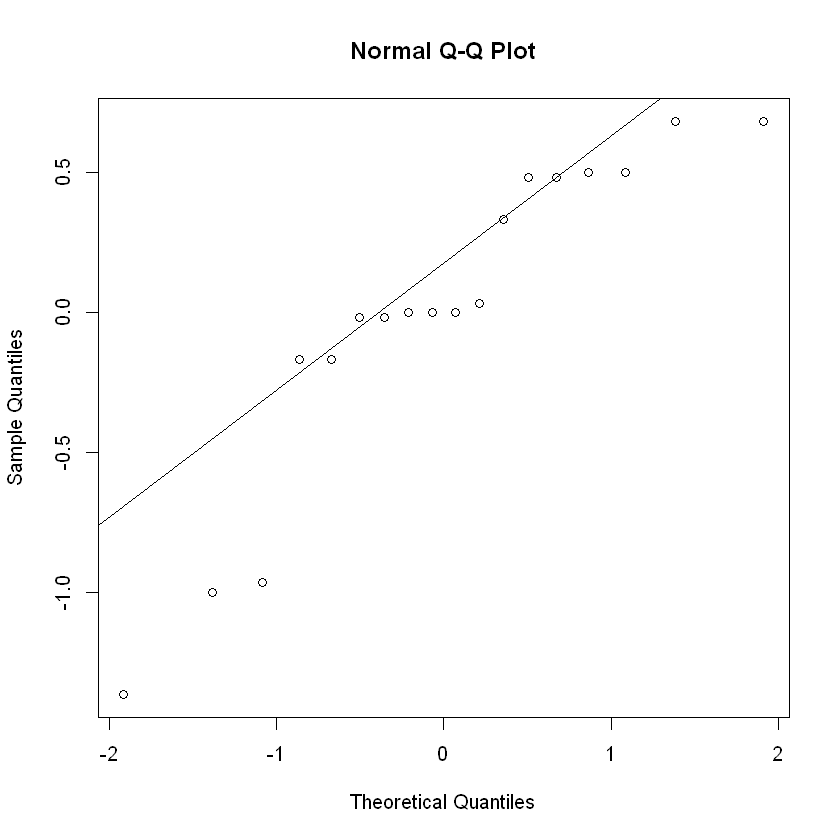

In [ ]:
# Check for model adequacy by plotting the residuals and the QQ of the residuals
plot(model8$residuals)
qqnorm(model8$residuals)
qqline(model8$residuals)
bartlett.test(model8$residuals ~ temp)

In [ ]:
# Check the means at each level given each factor
model.tables(model8, type="means")

Warning message in replications(paste("~", xx), data = mf):
"non-factors ignored: pressure"Warning message in replications(paste("~", xx), data = mf):
"non-factors ignored: day, pressure"Warning message in replications(paste("~", xx), data = mf):
"non-factors ignored: pressure, temp"Warning message in replications(paste("~", xx), data = mf):
"non-factors ignored: day, pressure, temp"

Tables of means
Grand mean
         
88.79444 

 day 
day
    1     2 
87.94 89.64 

 pressure 
pressure
  250   260   270 
88.27 88.79 89.32 

 temp 
temp
  High    Low Medium 
 91.53  85.78  89.07 

 day:pressure 
   pressure
day 250   260   270  
  1 87.58 87.94 88.31
  2 88.96 89.64 90.33

 day:temp 
   temp
day High  Low   Medium
  1 90.20 85.37 88.27 
  2 92.87 86.20 89.87 

 pressure:temp 
        temp
pressure High  Low   Medium
     250 90.48 85.61 88.72 
     260 91.53 85.78 89.07 
     270 92.58 85.96 89.42 

 day:pressure:temp 
, , temp = High

   pressure
day 250   260   270  
  1 89.10 90.20 91.30
  2 91.87 92.87 93.87

, , temp = Low

   pressure
day 250   260   270  
  1 85.62 85.37 85.12
  2 85.60 86.20 86.80

, , temp = Medium

   pressure
day 250   260   270  
  1 88.02 88.27 88.52
  2 89.42 89.87 90.32


**Build linear model, using “days” as blocking factor. Is “days” an effective blocking factor?**

Yes days is an effective blocking factor

**Are “Temperature” or “Pressure” or interactions are significant?**

No. There is no interaction between temperature and pressure when looking at the response yield

**Which Temperature and Pressure combination gives the highest yield.**

The temperature pressure combination that gives the highest yield is pressure=270,temp=High

**Perform a complete residual check.**

There are some issues with adequacy. The plot of the residuals does show some structure and the QQ plot doesn't appear to be normal. When using the Barttlet test we can see that the null is rejected.

-----------------------------------------------------------------------------------------------------------------

**Question 9**

The quality control depoartment of a fobric finishing plant is studying the effect of several factors on the dyeing of cotton-synthetic cloth used to manufacture men's shirts. Three operators, three cycle times, and two temperatures were selected, and three small specimens of cloth were dyed under each set of conditions. The finished cloth was compared to a standard, and a numerical score was assigned. The results follow. Analyze the data and draw conclusions. Comment on the model's adequacy.

Set up a data frame "fabric" with 3 factors

In [ ]:
# Read data from the working directory. Construct the data frame and needed vectors
data9  <- read.csv('Mid Term Question 9.csv')
head(data9)
fabric <- data9
cycletime <- fabric$Cycle.Time
operator <- factor(fabric$Operator)
temp <- fabric$Temperature
score <- fabric$Score

Cycle.Time,Operator,Temperature,Score
40,1,300,23
40,1,300,24
40,1,300,25
50,1,300,36
50,1,300,35
50,1,300,36


In [ ]:
# Construct the model and output its summaries
model9 <- aov(score ~ cycletime + operator + temp + cycletime*operator*temp)
model9
summary(model9)
summary.lm(model9)

Call:
   aov(formula = score ~ cycletime + operator + temp + cycletime * 
    operator * temp)

Terms:
                cycletime operator     temp cycletime:operator cycletime:temp
Sum of Squares     4.0000 261.3333  50.0741           213.5000        53.7778
Deg. of Freedom         1        2        1                  2              1
                operator:temp cycletime:operator:temp Residuals
Sum of Squares        11.2593                 22.7222  740.6667
Deg. of Freedom             2                       2        42

Residual standard error: 4.199395
Estimated effects may be unbalanced

                        Df Sum Sq Mean Sq F value  Pr(>F)   
cycletime                1    4.0    4.00   0.227 0.63636   
operator                 2  261.3  130.67   7.410 0.00175 **
temp                     1   50.1   50.07   2.839 0.09939 . 
cycletime:operator       2  213.5  106.75   6.053 0.00490 **
cycletime:temp           1   53.8   53.78   3.050 0.08807 . 
operator:temp            2   11.3    5.63   0.319 0.72845   
cycletime:operator:temp  2   22.7   11.36   0.644 0.53017   
Residuals               42  740.7   17.63                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Call:
aov(formula = score ~ cycletime + operator + temp + cycletime * 
    operator * temp)

Residuals:
   Min     1Q Median     3Q    Max 
-5.833 -2.667 -1.028  1.958  9.444 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)
(Intercept)               7.500e+00  8.008e+01   0.094    0.926
cycletime                 3.167e-01  1.581e+00   0.200    0.842
operator2                -1.374e+02  1.132e+02  -1.214    0.232
operator3                -6.128e+01  1.132e+02  -0.541    0.591
temp                      5.111e-02  2.457e-01   0.208    0.836
cycletime:operator2       2.567e+00  2.235e+00   1.148    0.257
cycletime:operator3       1.150e+00  2.235e+00   0.514    0.610
cycletime:temp           -6.667e-04  4.849e-03  -0.137    0.891
operator2:temp            4.278e-01  3.474e-01   1.231    0.225
operator3:temp            2.678e-01  3.474e-01   0.771    0.445
cycletime:operator2:temp -7.667e-03  6.858e-03  -1.118    0.270
cycletime:operator3:temp -5.000e-03  6.8

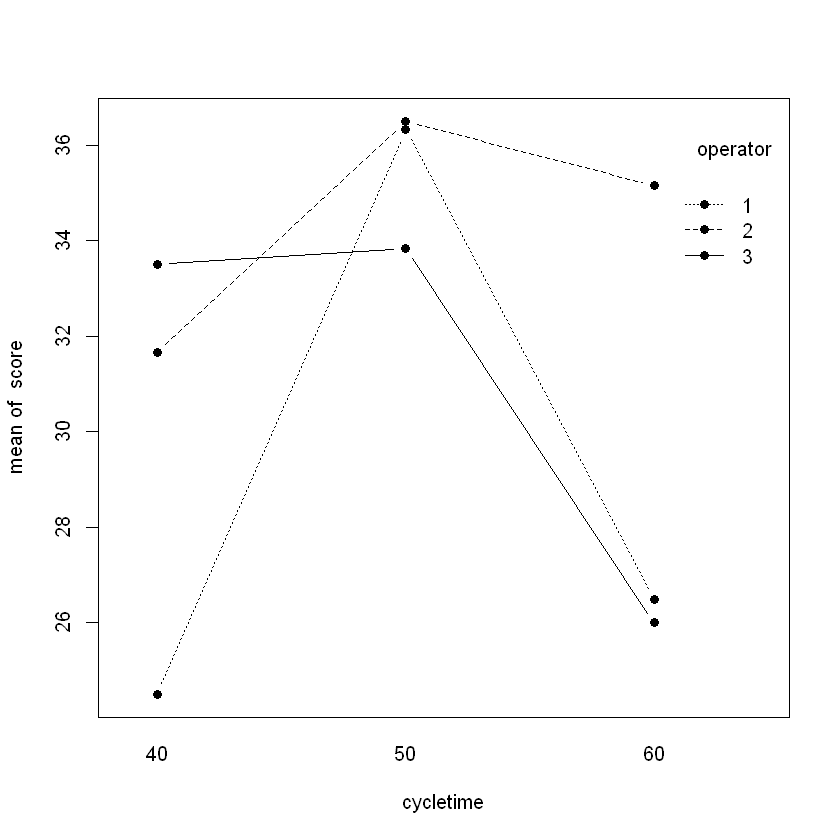

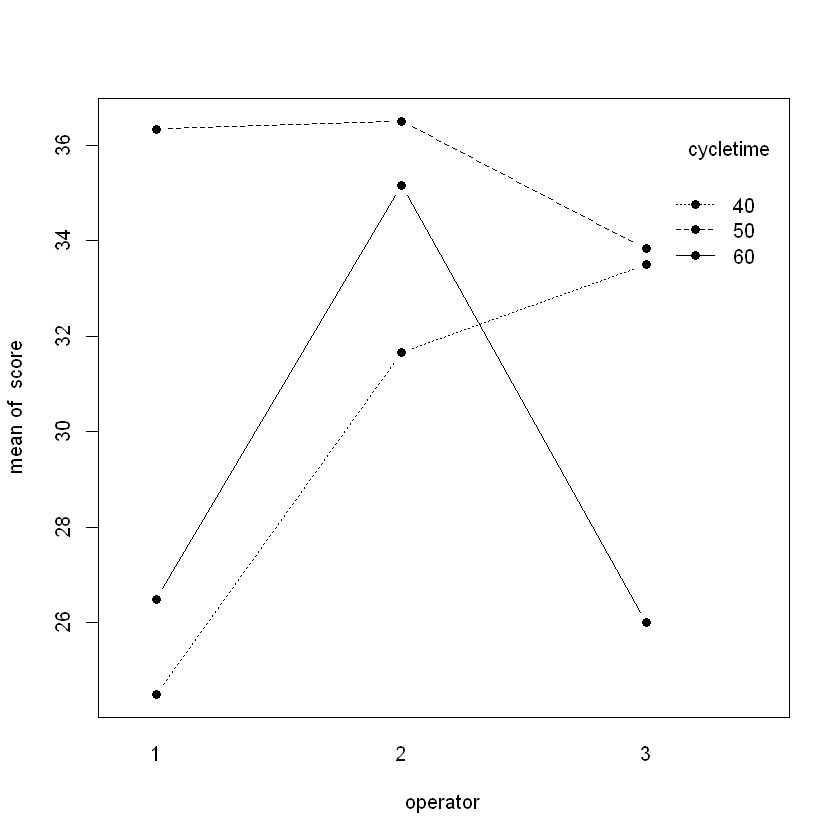

In [ ]:
# Check for interactions between factors using interactions plots
interaction.plot(cycletime,operator,score,type="b",pch=19,fixed=T)
interaction.plot(operator,cycletime,score,type="b",pch=19,fixed=T)

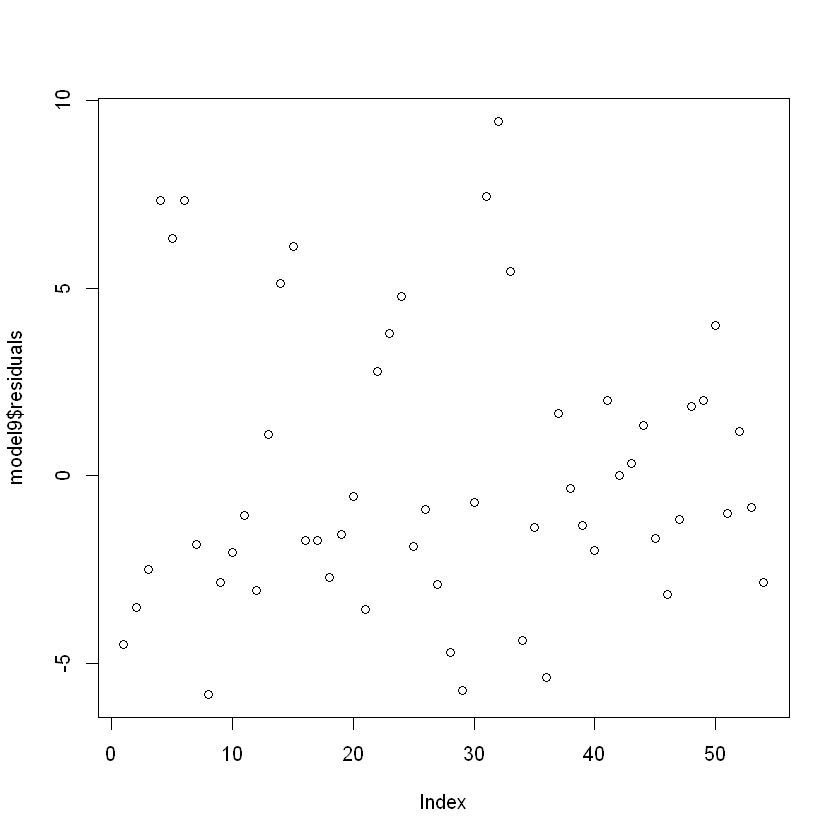


	Bartlett test of homogeneity of variances

data:  model9$residuals by temp
Bartlett's K-squared = 0.13708, df = 1, p-value = 0.7112


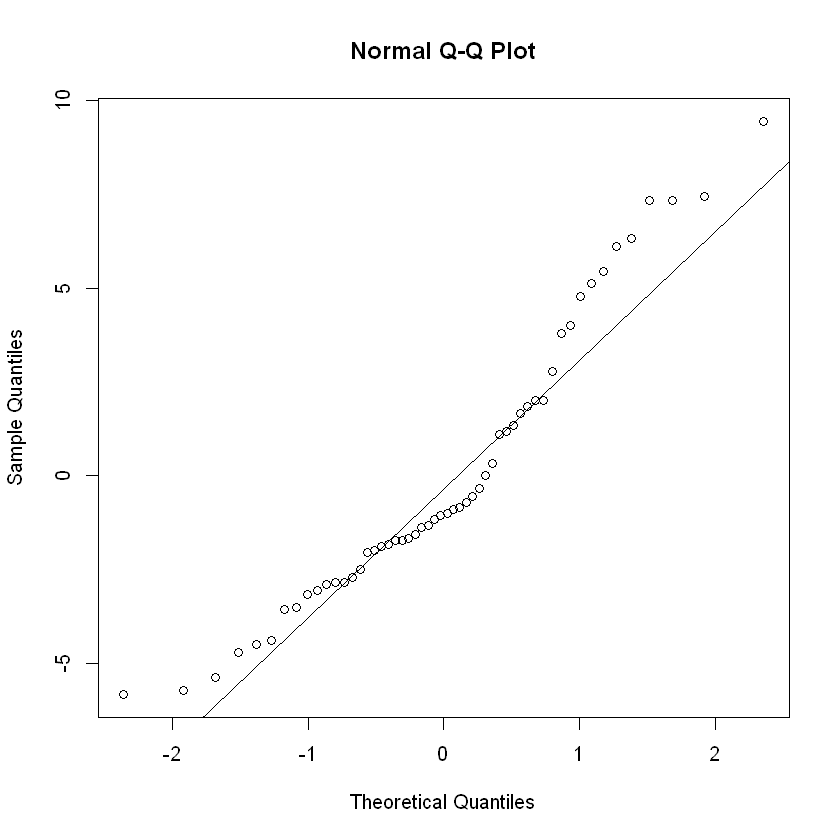

In [ ]:
# Check for model adequacy by plotting the residuals and the QQ of the residuals
plot(model9$residuals)
qqnorm(model9$residuals)
qqline(model9$residuals)
bartlett.test(model9$residuals ~ temp)

In [ ]:
# Construct a reduced model and output its summaries
model9.1 <- aov(score ~ cycletime + operator + temp)
model9.1
summary(model9.1)
summary.lm(model9.1)

Call:
   aov(formula = score ~ cycletime + operator + temp)

Terms:
                cycletime  operator      temp Residuals
Sum of Squares     4.0000  261.3333   50.0741 1041.9259
Deg. of Freedom         1         2         1        49

Residual standard error: 4.611268
Estimated effects may be unbalanced

            Df Sum Sq Mean Sq F value  Pr(>F)   
cycletime    1    4.0    4.00   0.188 0.66640   
operator     2  261.3  130.67   6.145 0.00416 **
temp         1   50.1   50.07   2.355 0.13132   
Residuals   49 1041.9   21.26                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Call:
aov(formula = score ~ cycletime + operator + temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8148 -3.7407  0.3889  2.7870  8.9259 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 18.25926    9.08271   2.010   0.0499 * 
cycletime   -0.03333    0.07685  -0.434   0.6664   
operator2    5.33333    1.53709   3.470   0.0011 **
operator3    2.00000    1.53709   1.301   0.1993   
temp         0.03852    0.02510   1.535   0.1313   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.611 on 49 degrees of freedom
Multiple R-squared:  0.2324,	Adjusted R-squared:  0.1697 
F-statistic: 3.708 on 4 and 49 DF,  p-value: 0.01028


**Build a regression model. Any interaction among factors?**

Yes there does appear to be interactions among the factors. There is an interaction between cycletime 40 to 60 and operator 2 to 3. There also appears to be an interaction with operator 3 with 1 and 2 when measuring the means from cycletime 40 to 60.

**Which factor can be used as Blocking factor?**

Cycletime, Operator and temperature could all possibly be used as a blocking factor. But the biggest nucience probably comes from Operator. So using Operator as a blocking factor would be a good way to parse out the noise associated with differences between Operators.

**Is the Blocking factor effective?**

Yes. Using Operator as the blocking factor is effective. The summary output for the aov shows that Operator is significant at the .001 alpha level.

**Consider any reduced model?**

A reduced model is not adequate. The multiple r is significantly lower showing that it is not better as explaining the variance

**Do a complete 3-part residual assumption check.**

The residuals plot looks good. The residuals appear to be random and structureless. The QQ plot of the residuals also looks good. Normality can be assumed. If we test normality given temp we cannot reject the null.

-----------------------------------------------------------------------------------------------------------------

**Question 10**

The effect of five different ingredients (A,B,C,D,E) on the reaction time of a chemical process is being studied. Each batch of new material is only large enough to permit five runs to be made. Furthermore, each run requires approximately 1 1/2 hours, so only five runs tcan be made in one day. The expe4rimenter decides to run the experiment as a Latin square so that day and btach effects may be systematically controlled. She obtains the data that follow. Analyze the data from this experiment (use 𝛼 = 0.05) and draw conclusions.

Set up a data frame. “chemical”. Use Day and Batch columns and row, in Latin square design. Ingredient as Treatment. Either enter manually or use design.lsd() [If use design.lsd(), must enter the response values in order given by data]

In [ ]:
data10  <- read.csv('Mid Term Question 10.csv')
head(data10)
chemical <- data10
time <- chemical$Time
batch <- chemical$Batch
day <- chemical$Day
catalyst <- chemical$Catalyst

Batch,Day,Catalyst,Time
1,1,A,8
2,1,C,11
3,1,B,4
4,1,D,6
5,1,E,4
1,2,B,7


In [ ]:
# Construct a reduced model and output its summaries
model10 <- aov(time ~ batch + day + catalyst + catalyst*batch*day)
model10
summary(model10)
summary.lm(model10)
anova(model10)

Call:
   aov(formula = time ~ batch + day + catalyst + catalyst * batch * 
    day)

Terms:
                    batch       day  catalyst batch:catalyst day:catalyst
Sum of Squares    0.18000   0.02000 141.44000       17.50114     11.47883
Deg. of Freedom         1         1         4              4            4
                batch:day batch:day:catalyst Residuals
Sum of Squares    0.87242            2.91554  32.23207
Deg. of Freedom         1                  4         5

Residual standard error: 2.538979
Estimated effects may be unbalanced

                   Df Sum Sq Mean Sq F value Pr(>F)  
batch               1   0.18    0.18   0.028 0.8738  
day                 1   0.02    0.02   0.003 0.9577  
catalyst            4 141.44   35.36   5.485 0.0451 *
batch:catalyst      4  17.50    4.38   0.679 0.6356  
day:catalyst        4  11.48    2.87   0.445 0.7735  
batch:day           1   0.87    0.87   0.135 0.7280  
batch:day:catalyst  4   2.92    0.73   0.113 0.9724  
Residuals           5  32.23    6.45                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Call:
aov(formula = time ~ batch + day + catalyst + catalyst * batch * 
    day)

Residuals:
         1          2          3          4          5          6          7 
-3.053e-16 -2.010e-01  2.740e-01  2.400e+00 -5.588e-01 -2.144e-01 -7.249e-16 
         8          9         10         11         12         13         14 
 1.000e+00 -5.628e-01 -2.400e+00 -1.200e+00 -1.000e+00  1.467e+00  2.235e+00 
        15         16         17         18         19         20         21 
-4.169e-01 -4.422e-01 -5.495e-15 -2.235e+00  3.812e-01 -1.000e+00  5.588e-01 
        22         23         24         25 
-2.382e-02  1.200e+00  1.000e+00 -2.613e-01 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)
(Intercept)          8.31818    5.90840   1.408    0.218
batch               -0.22727    2.60628  -0.087    0.934
day                 -0.22727    2.60628  -0.087    0.934
catalystB           -0.34780    9.97341  -0.035    0.974
catalystC            7.30256    9.92056   0.736 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
batch,1,0.1800000,0.1800000,0.0279225,0.87383901
day,1,0.0200000,0.0200000,0.0031025,0.95773797
catalyst,4,141.4400000,35.3600000,5.4852194,0.04505059
batch:catalyst,4,17.5011364,4.3752841,0.6787159,0.63563048
day:catalyst,4,11.4788301,2.8697075,0.4451633,0.77346879
batch:day,1,0.8724226,0.8724226,0.1353345,0.72802364
batch:day:catalyst,4,2.9155367,0.7288842,0.1130681,0.97235393
Residuals,5,32.2320742,6.4464148,NA,NA


**Build a linear model, using aov(). Does the ingredients affect the reaction time?**

**Are Day, Batch effective Blocking factors? Check interaction between Day and Batch.**

**Find the lowest reaction time.**

**Perform residual check.**